# Load packages and libraries

In [2]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratDisk))
library(svglite)
library(RColorBrewer)




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [3]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

In [4]:
#AvailableData()

# Read objects merged_unprocessed_db_filt_clustered_QCed

In [5]:
setwd("/scratch/manuel.tardaguila/2026_Ditadi_test/processing_outputs/")



In [6]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_reclustered.rds")

In [7]:
adata

An object of class Seurat 
97949 features across 9457 samples within 3 assays 
Active assay: SCT (25175 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

# General plots

In [8]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/graphs/"

if(file.exists(path_graphs)){
    
}else{

    dir.create(path_graphs)
}

NULL

## UMAP by Seurat clusters

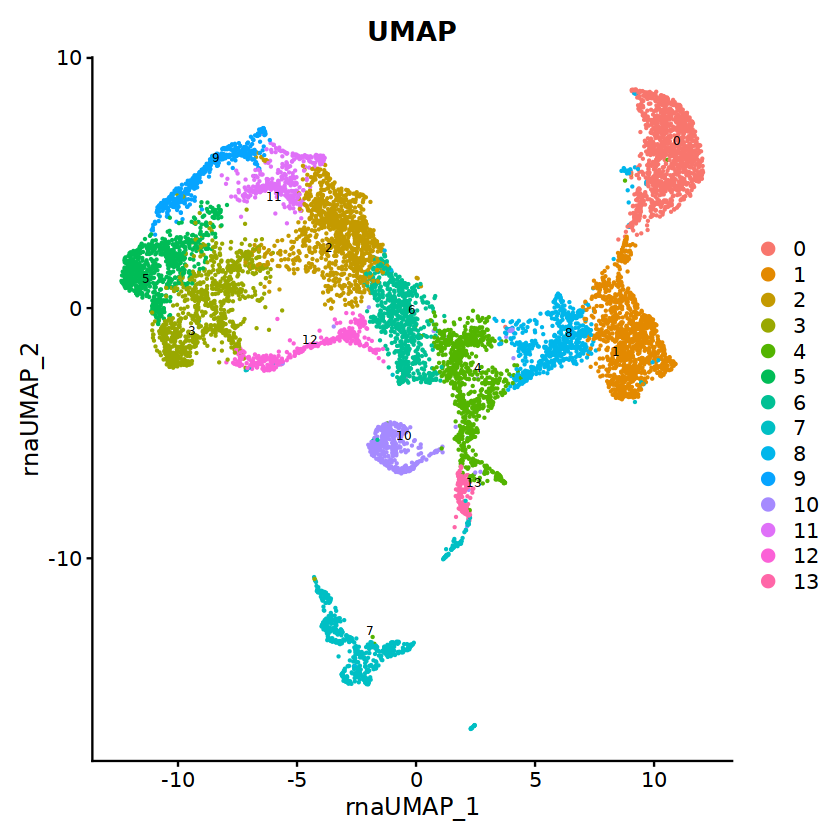

In [8]:
p3 <- DimPlot(adata, reduction = "umap.rna", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("UMAP")
p3

In [9]:
## Graph UMAP by CellTypist_label_filtered

setwd(path_graphs)
png(file='UMAP_by_seurat_clusters.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Graph UMAP by marker genes

In [9]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:25175] "AL627309.1" "AL627309.3" "AL627309.5" "AC114498.1" ...


In [10]:
genes[grep("GZM", genes)]

[1] "GZMA" "GZMM"

In [11]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNGR2"

In [35]:
DefaultAssay(adata) <- 'SCT'

In [17]:
phESC <- FeaturePlot(adata, features = c('SOX2','SOX4','POU5F1'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

# Add the title using plot_annotation
phESC <- phESC + plot_annotation(
  title = 'Markers of hESCs',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

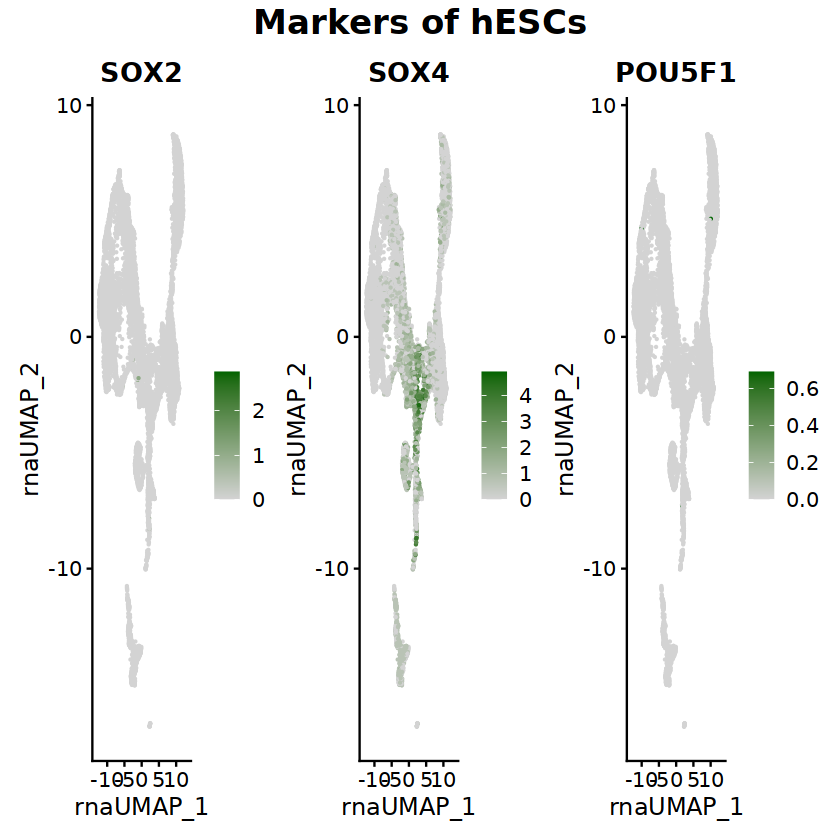

In [18]:
phESC

In [19]:
setwd(path_graphs)
png(file='UMAP_marker_genes_hESC.png', width =1000, height = 250)
phESC
dev.off()

png 
  2

In [20]:
pEndoderm <- FeaturePlot(adata, features = c("HNF4A",'APOA1','EPCAM'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

# Add the title using plot_annotation
pEndoderm <- pEndoderm + plot_annotation(
  title = 'Markers of Endoderm',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

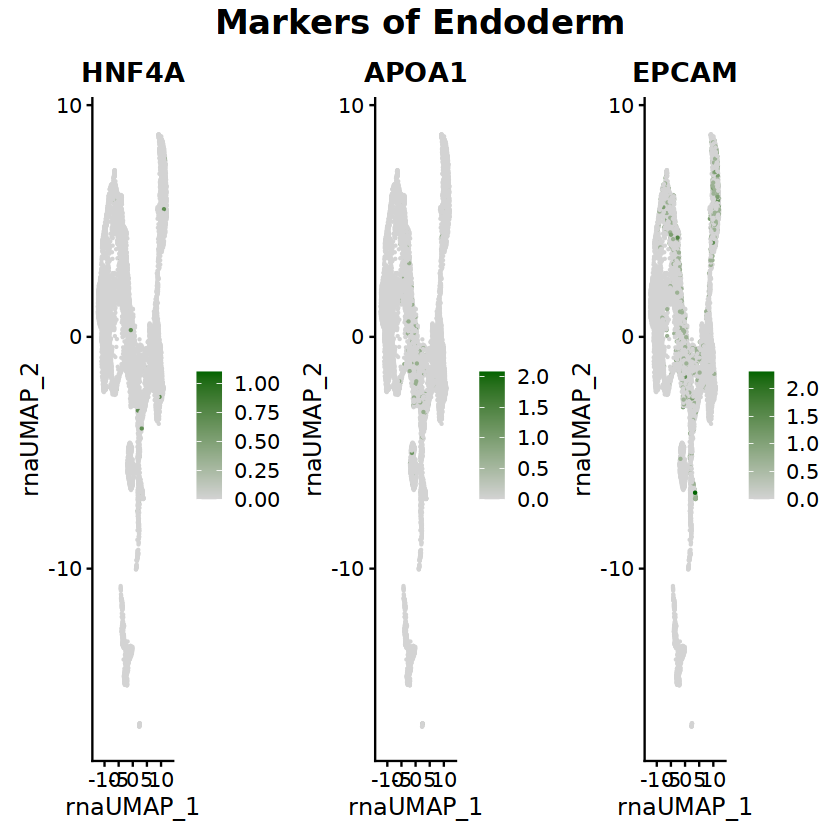

In [21]:
pEndoderm

In [22]:
setwd(path_graphs)
png(file='UMAP_marker_genes_Endoderm.png', width =1000, height = 250)
pEndoderm
dev.off()

png 
  2

In [23]:
pHSC <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

# Add the title using plot_annotation
pHSC <- pHSC + plot_annotation(
  title = 'Markers of HSCs',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

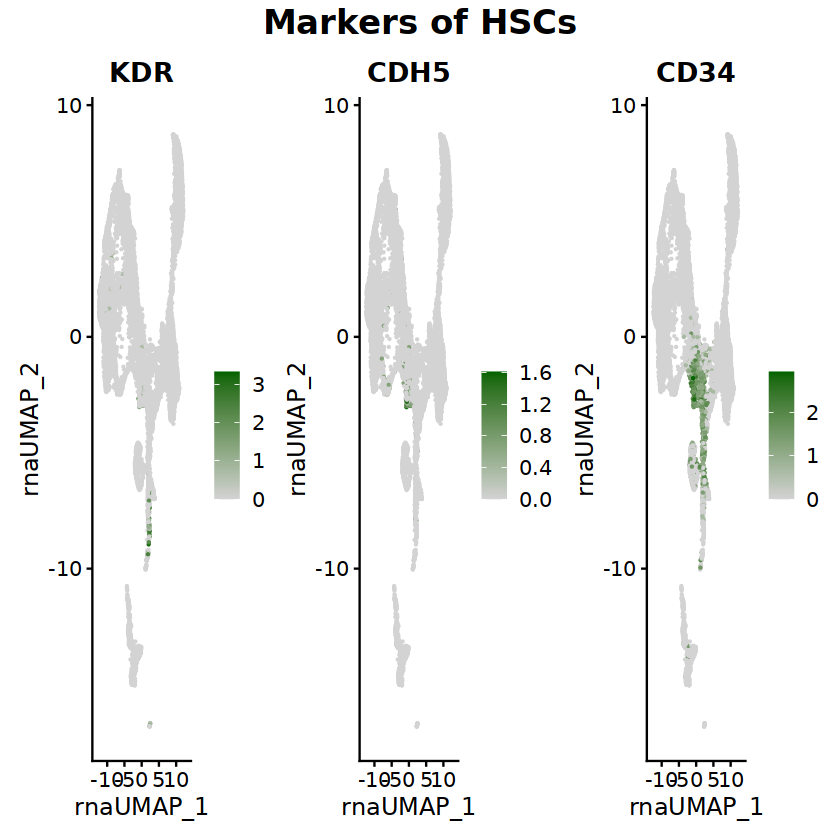

In [24]:
pHSC

In [25]:
setwd(path_graphs)
png(file='UMAP_marker_genes_HSCs.png', width =1000, height = 250)
pHSC
dev.off()

png 
  2

In [29]:
pRBC <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

# Add the title using plot_annotation
pRBC <- pRBC + plot_annotation(
  title = 'Markers of erythroid lineage',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

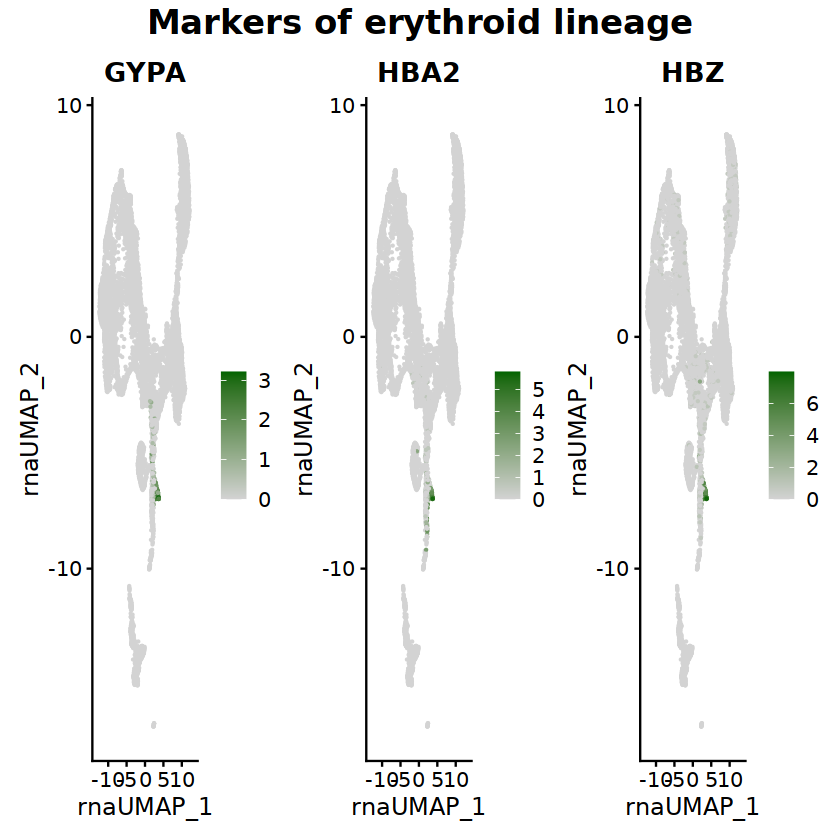

In [30]:
pRBC

In [31]:
setwd(path_graphs)
png(file='UMAP_marker_genes_erythroid_lineage.png', width =1000, height = 250)
pRBC
dev.off()

png 
  2

In [36]:
pMK <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

# Add the title using plot_annotation
pMK <- pMK + plot_annotation(
  title = 'Markers of megakaryocyte lineage',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

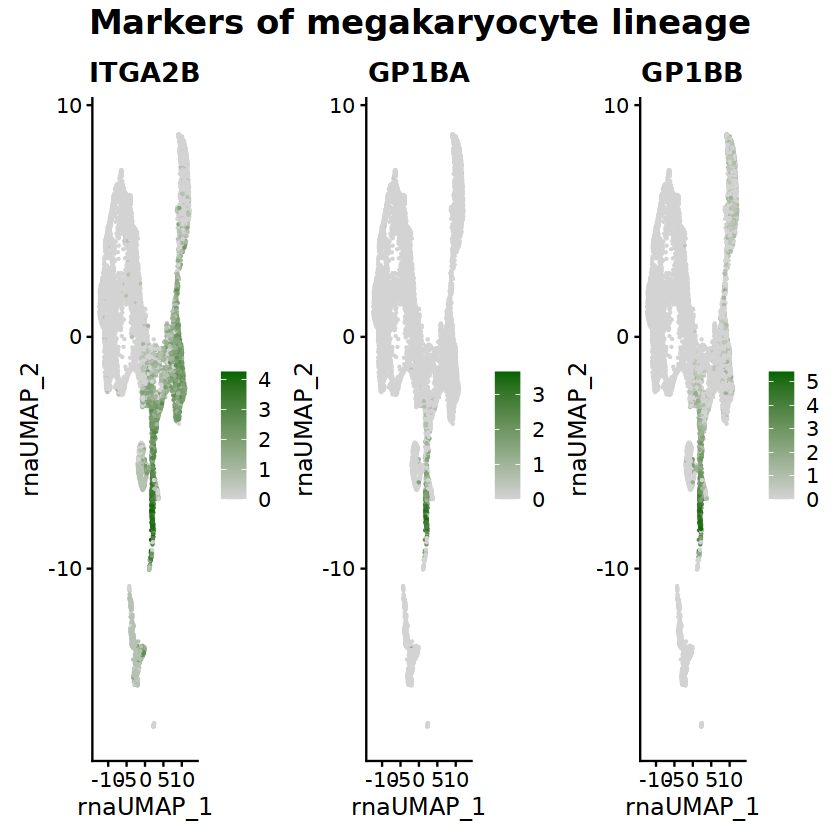

In [37]:
pMK

In [38]:
setwd(path_graphs)
png(file='UMAP_marker_genes_megakaryocyte_lineage.png', width =1000, height = 250)
pMK
dev.off()

png 
  2

In [41]:
pMAST <- FeaturePlot(adata, features = c('CPA3','CD33','PTPRC','TPSB2'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)

# Add the title using plot_annotation
pMAST <- pMAST + plot_annotation(
  title = 'Markers of Mast cells',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

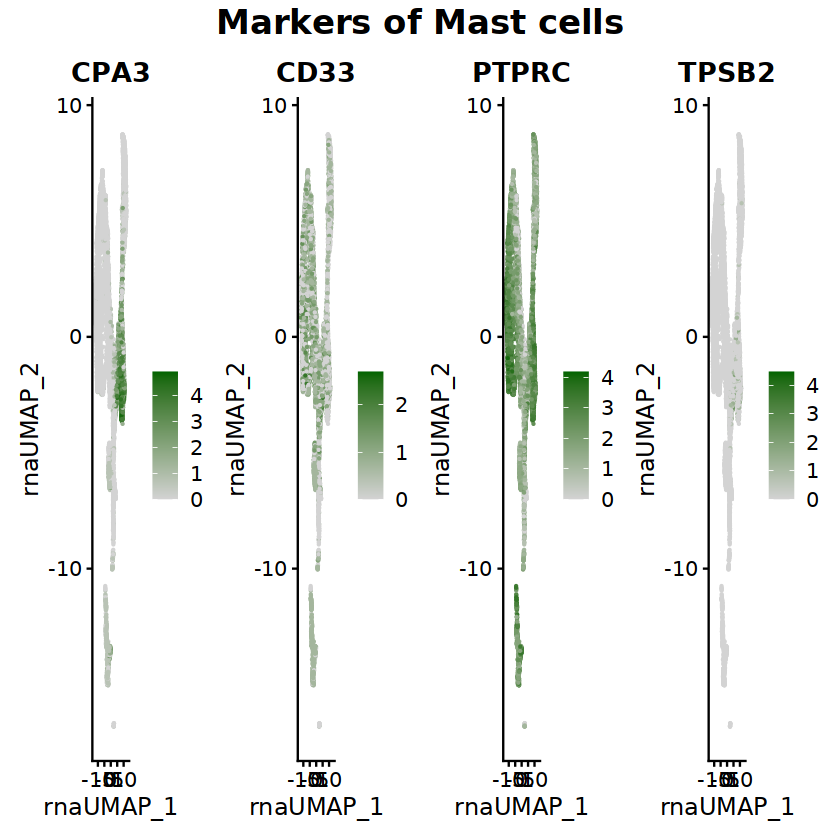

In [42]:
pMAST

In [43]:
setwd(path_graphs)
png(file='UMAP_marker_genes_Mast_cells.png', width =1000, height = 250)
pMAST
dev.off()

png 
  2

In [44]:
pPrecursorMonocyteDC <- FeaturePlot(adata, features = c('CD33','PTPRC','CD1C','HLA-DRA'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)

# Add the title using plot_annotation
pPrecursorMonocyteDC <- pPrecursorMonocyteDC + plot_annotation(
  title = 'Markers of precursor of monocytes and DCs',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

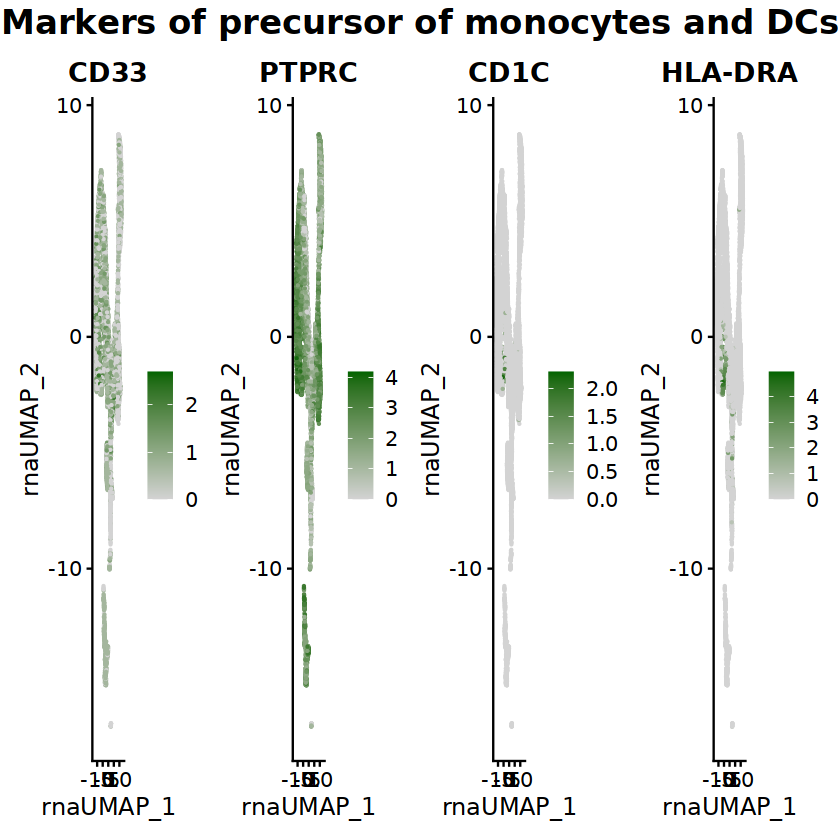

In [45]:
pPrecursorMonocyteDC

In [46]:
setwd(path_graphs)
png(file='UMAP_marker_genes_precursor_of_monocytes_and_DCs.png', width =1000, height = 250)
pPrecursorMonocyteDC
dev.off()

png 
  2

In [47]:
pPrecursorNF_mye <- FeaturePlot(adata, features = c('CD33','PTPRC','MPO','S100A9'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)

# Add the title using plot_annotation
pPrecursorNF_mye <- pPrecursorNF_mye + plot_annotation(
  title = 'Markers of precursor of Neutrophils and myeloid cells',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

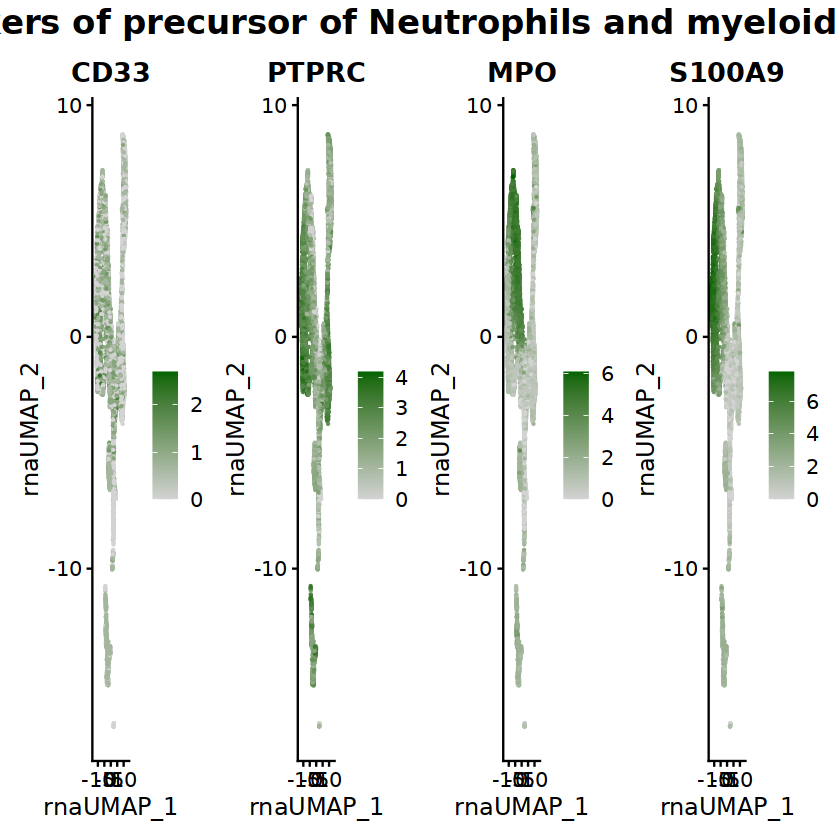

In [48]:
pPrecursorNF_mye

In [49]:
setwd(path_graphs)
png(file='UMAP_marker_genes_precursor_of_Neutrophils_and_myeloid_cells.png', width =1000, height = 250)
pPrecursorNF_mye
dev.off()

png 
  2

In [50]:
pMono <- FeaturePlot(adata, features = c('PTPRC','HLA-DRA','S100A9','CD14'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)

# Add the title using plot_annotation
pMono <- pMono + plot_annotation(
  title = 'Markers of precursor of monocytes',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

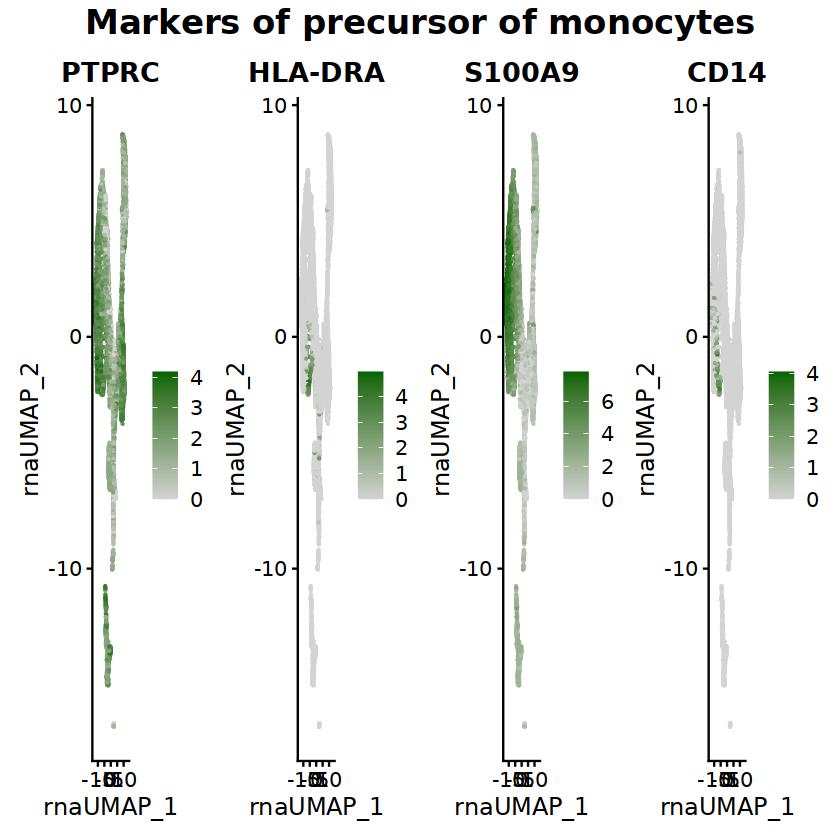

In [51]:
pMono

In [52]:
setwd(path_graphs)
png(file='UMAP_marker_genes_Monocytes.png', width =1000, height = 250)
pMono
dev.off()

png 
  2

In [56]:
pNK <- FeaturePlot(adata, features = c('NCAM1','NKG7','FCGR3A','KLRD1','GNLY'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 5)

# Add the title using plot_annotation
pNK <- pNK + plot_annotation(
  title = 'Markers of precursor of NK cells',
  theme = theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
  )
)

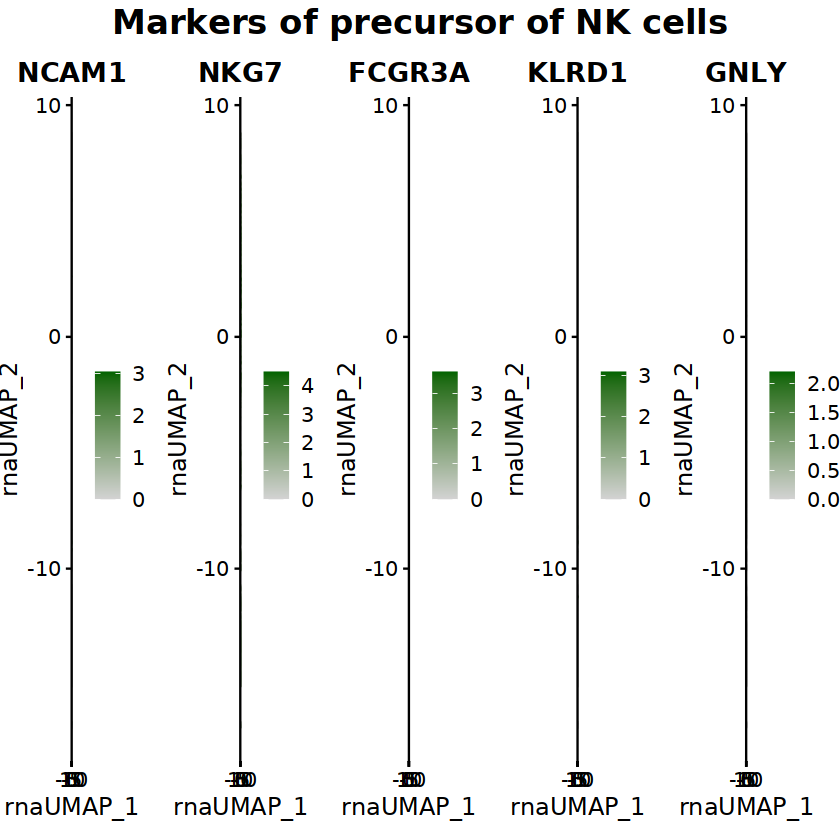

In [57]:
pNK

In [58]:
setwd(path_graphs)
png(file='UMAP_marker_genes_NK_cells.png', width =1000, height = 250)
pNK
dev.off()

png 
  2

In [51]:
## Graph 













pMK_PolyPlo <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)



p_7 <- FeaturePlot(adata, features = c('PTPRC','RAG1','RAG2'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

pMono <- FeaturePlot(adata, features = c('CD14','S100A9','CD1C'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_9 <- FeaturePlot(adata, features = c('TPSB2','TPSAB1','KIT'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

pFibro_and_MPO <- FeaturePlot(adata, features = c('COL1A1','SPARC','MPO'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

pNK <- FeaturePlot(adata, features = c('NCAM1','NKG7','FCGR3A'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

#phESC / pEndoderm / pHSC / pRBC / pMK / pMAST / pMono / pNK / pFibro_and_MPO


# 'RAG1','RAG2'



In [52]:
setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 2250)
phESC / pEndoderm / pHSC / pRBC / pMK / pMAST / pMono / pNK / pFibro_and_MPO
dev.off()

png 
  2

# Read Alsinet cell typist prediction

In [59]:
setwd("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/")

In [60]:
cell_typist<-read.csv(file="Alsinet_celltypist_prediction.csv")

In [61]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [62]:
str(row.names(cell_typist))

 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [63]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [64]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [65]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	9457 obs. of  2 variables:
 $ predicted_labels: chr  "PrimitiveStreak" "NeutrophilMyeloidProgenitor" "NeutrophilMyeloidProgenitor" "NeutrophilMyeloidProgenitor" ...
 $ conf_score      : num  0.95094 0.99986 0.00444 0.87522 0.99843 ...
 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [66]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Alsinet'
)

In [67]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Alsinet'
)

## UMAPS of Alsinet

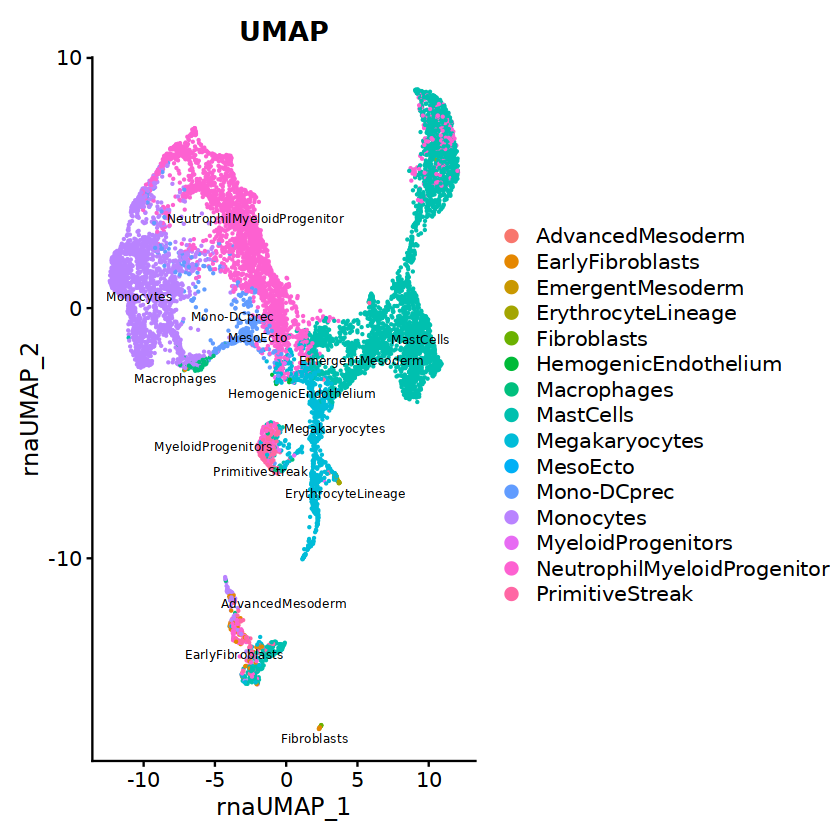

In [68]:
p3 <- DimPlot(adata, reduction = "umap.rna", group.by = "CellTypist_label_Alsinet", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("UMAP")
p3

In [69]:
## Graph UMAP by CellTypist_label_filtered

setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_Alsinet.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

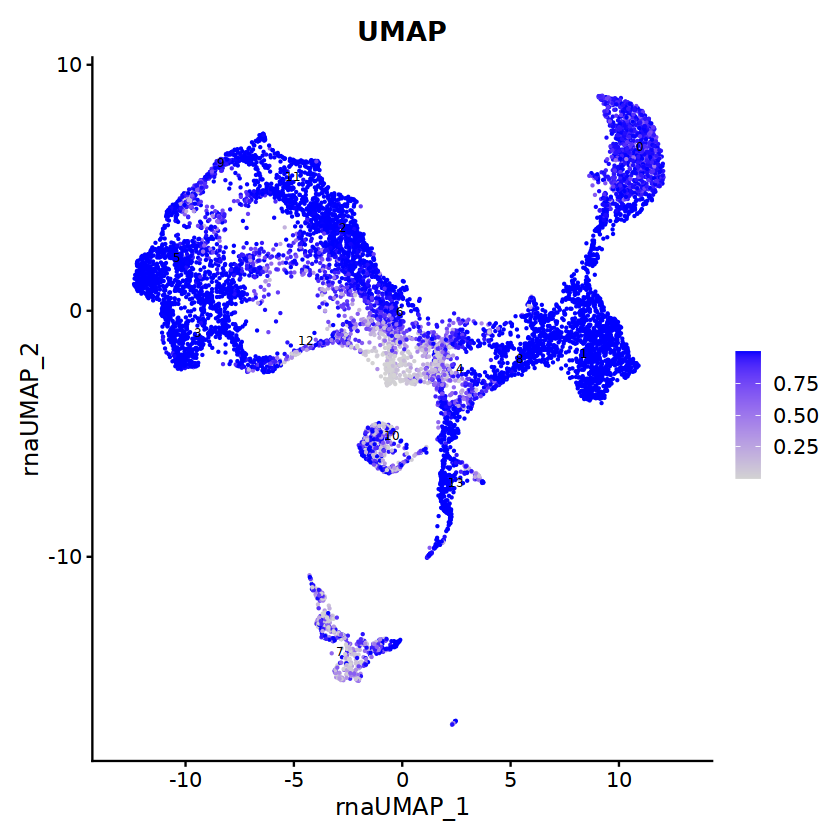

In [70]:
## Graph UMAP by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.rna", 
              features = "CellTypist_conf_score_Alsinet", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("UMAP")

p3



In [71]:
setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_Alsinet_CONF_SCORE.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Barplot of clusters

In [72]:
met<-adata[[]]

In [73]:
colnames(met)

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "nCount_RNA_raw"               
 [5] "nFeature_RNA_raw"              "percent.mt"                   
 [7] "scDblFinder.class"             "scDblFinder.score"            
 [9] "scDblFinder.weighted"          "scDblFinder.cxds_score"       
[11] "Diff"                          "nCount_SCT"                   
[13] "nFeature_SCT"                  "SCT_snn_res.2"                
[15] "seurat_clusters"               "SCT_snn_res.0.5"              
[17] "CellTypist_label_Alsinet"      "CellTypist_conf_score_Alsinet"

In [74]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_Alsinet",'orig.ident'))

In [75]:
#str(met.dt)

In [76]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [77]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [78]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [79]:
str(Freq.table)

'data.frame':	66 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 14 levels "0","1","2","3",..: 1 1 2 11 11 11 11 11 11 11 ...
 $ orig.ident              : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_Alsinet: chr  "MastCells" "NeutrophilMyeloidProgenitor" "MastCells" "AdvancedMesoderm" ...
 $ Freq                    : int  1063 233 1089 1 1 17 38 54 9 2 ...
 $ TOTAL                   : int  1296 1296 1089 403 403 403 403 403 403 403 ...
 $ Perc                    : num  82.02 17.98 100 0.25 0.25 ...


In [80]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  170.0   403.0   591.0   632.9   818.0  1296.0 

In [81]:
met.dt<-data.table(met, key=c("CellTypist_label_Alsinet"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_Alsinet=.N),by=key(met.dt)], stringsAsFactors=F)



In [82]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ CellTypist_label_Alsinet     : chr  "AdvancedMesoderm" "EarlyFibroblasts" "EmergentMesoderm" "ErythrocyteLineage" ...
 $ Freq_CellTypist_label_Alsinet: int  2 93 2 24 9 13 87 3180 829 1 ...


### Filter x axis by frequency

In [83]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	66 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 14 levels "0","1","2","3",..: 1 1 2 11 11 11 11 11 11 11 ...
 $ orig.ident              : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_Alsinet: chr  "MastCells" "NeutrophilMyeloidProgenitor" "MastCells" "AdvancedMesoderm" ...
 $ Freq                    : int  1063 233 1089 1 1 17 38 54 9 2 ...
 $ TOTAL                   : int  1296 1296 1089 403 403 403 403 403 403 403 ...
 $ Perc                    : num  82.02 17.98 100 0.25 0.25 ...


In [84]:
vector_colors_CellTypist_label_Alsinet<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_CellTypist_label_Alsinet)

[1] 22

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


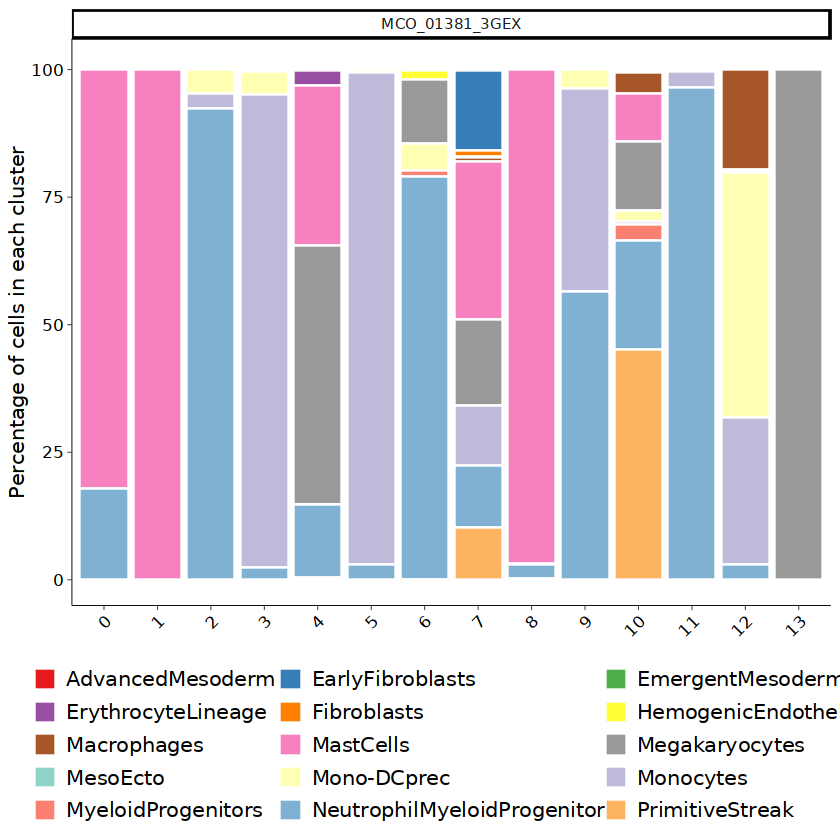

In [85]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_Alsinet)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_Alsinet,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))



stacked_barplot
  




  

In [86]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Violin plot of confidence score

In [87]:
str(met)

'data.frame':	9457 obs. of  18 variables:
 $ orig.ident                   : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ nCount_RNA                   : num  1049 44869 56017 39429 48620 ...
 $ nFeature_RNA                 : int  568 7042 7955 6674 7389 560 8540 7653 5794 8386 ...
 $ nCount_RNA_raw               : num  1904 45083 56246 39640 48809 ...
 $ nFeature_RNA_raw             : int  1119 7052 7965 6682 7389 1152 8561 7665 5820 8401 ...
 $ percent.mt                   : num  0.477 4.656 3.951 4.053 4.967 ...
 $ scDblFinder.class            : Factor w/ 2 levels "singlet","doublet": 1 1 1 1 1 1 1 1 1 1 ...
 $ scDblFinder.score            : num  0.0247 0.1318 0.104 0.2349 0.2692 ...
 $ scDblFinder.weighted         : num  0.0396 0.1741 0.1656 0.4283 0.3483 ...
 $ scDblFinder.cxds_score       : num  0 0.0908 0.0352 0.0746 0.1804 ...
 $ Diff                         : chr  "Diff_Ditadi_wt" "Diff_Ditadi_wt" "Diff_Ditadi_wt" "Diff_Ditadi_wt" ...
 $ nCount

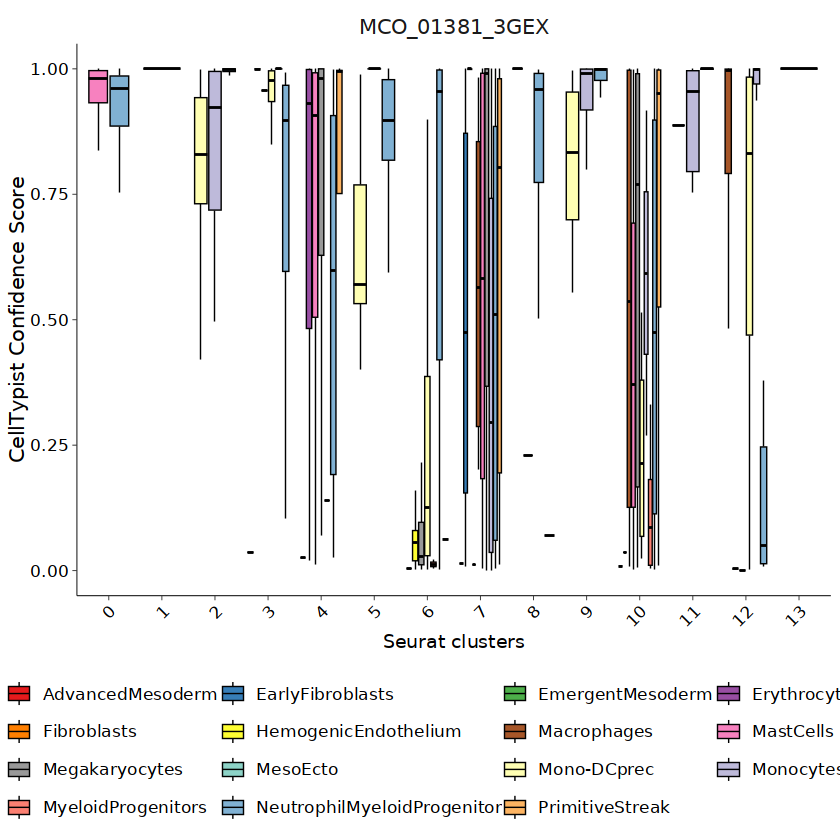

In [88]:
library(ggplot2)
library(RColorBrewer)

# 1. Define color vector
vector_colors_CellTypist_label_Alsinet <- c(brewer.pal(9, "Set1"), brewer.pal(12, "Set3"), "grey80")

# 2. Build the Plot (Boxplot only)
boxplot_only_plot <- ggplot(met, aes(x = seurat_clusters, 
                                     y = CellTypist_conf_score_Alsinet, 
                                     fill = CellTypist_label_Alsinet)) +
  
  # Grouped boxplots without outliers
  # width = 0.7 gives them more horizontal space since the violins are gone
  geom_boxplot(width = 0.7, 
               color = "black", 
               linewidth = 0.3,
               outlier.shape = NA, 
               position = position_dodge(width = 0.8)) +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = 'free_x', space = 'free_x') +
  
  # Manual colors and drop unused labels from legend
  scale_fill_manual(values = vector_colors_CellTypist_label_Alsinet,
                    drop = TRUE, 
                    name = "Alsinet label") +
  
  # Ensure X-axis drops empty clusters
  scale_x_discrete(name = "Seurat clusters", drop = TRUE) +
  
  # Standardize Y-axis for confidence scores
  scale_y_continuous(limits = c(0, 1)) +
  
  labs(y = "CellTypist Confidence Score") +
  
  # Applying your requested theme styling
  theme_classic() +
  theme(
    strip.background = element_blank(),
    strip.text = element_text(size = 12),
    axis.title.y = element_text(size = 12, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    axis.text.x = element_text(angle = 45, size = 10, vjust = 1, hjust = 1, color = "black"),
    axis.line = element_line(linewidth = 0.2),
    axis.ticks = element_line(linewidth = 0.2),
    legend.position = "bottom",
    legend.text = element_text(size = 10),
    legend.title = element_blank()
  ) +
  guides(fill = guide_legend(nrow = 4, byrow = TRUE))

print(boxplot_only_plot)

In [89]:
setwd(path_graphs)

svgname<-paste("Violin_plot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= boxplot_only_plot,
         device="svg", width =13, height = 13)
}

## Dot plot

In [90]:
summary_means <- met %>%
  group_by(orig.ident, seurat_clusters, CellTypist_label_Alsinet) %>%
  dplyr::summarise(
    mean_conf_score = mean(CellTypist_conf_score_Alsinet, na.rm = TRUE),
    cell_count = n(),
    .groups = "drop" # This replaces the need for ungroup()
  )

# View results
head(summary_means)

orig.ident     seurat_clusters CellTypist_label_Alsinet    mean_conf_score
1 MCO_01381_3GEX 0               MastCells                   0.9437757      
2 MCO_01381_3GEX 0               NeutrophilMyeloidProgenitor 0.9135896      
3 MCO_01381_3GEX 1               MastCells                   0.9999996      
4 MCO_01381_3GEX 2               Mono-DCprec                 0.7773153      
5 MCO_01381_3GEX 2               Monocytes                   0.8106721      
6 MCO_01381_3GEX 2               NeutrophilMyeloidProgenitor 0.9718651      
  cell_count
1 1063      
2  233      
3 1089      
4   48      
5   30      
6  957

In [91]:
library(dplyr)

summary_final <- summary_means %>%
  # 1. Force the columns to characters to be safe
  mutate(
    seurat_clusters = as.character(seurat_clusters),
    orig.ident = as.character(orig.ident)
  ) %>%
  # 2. Use the explicit dplyr group_by
  dplyr::group_by(orig.ident, seurat_clusters) %>%
  # 3. Use the explicit dplyr mutate
  dplyr::mutate(
    cluster_total = sum(cell_count),
    percentage = (cell_count / cluster_total) * 100
  ) %>%
  dplyr::ungroup()

# VERIFICATION: This should now show ~1296 for Cluster 0


In [92]:
summary_final %>% filter(seurat_clusters == "0")
cat("\n")

summary_final %>% filter(seurat_clusters == "2")
cat("\n")

orig.ident     seurat_clusters CellTypist_label_Alsinet    mean_conf_score
1 MCO_01381_3GEX 0               MastCells                   0.9437757      
2 MCO_01381_3GEX 0               NeutrophilMyeloidProgenitor 0.9135896      
  cell_count cluster_total percentage
1 1063       1296          82.0216   
2  233       1296          17.9784

orig.ident     seurat_clusters CellTypist_label_Alsinet    mean_conf_score
1 MCO_01381_3GEX 2               Mono-DCprec                 0.7773153      
2 MCO_01381_3GEX 2               Monocytes                   0.8106721      
3 MCO_01381_3GEX 2               NeutrophilMyeloidProgenitor 0.9718651      
  cell_count cluster_total percentage
1  48        1035           4.637681 
2  30        1035           2.898551 
3 957        1035          92.463768

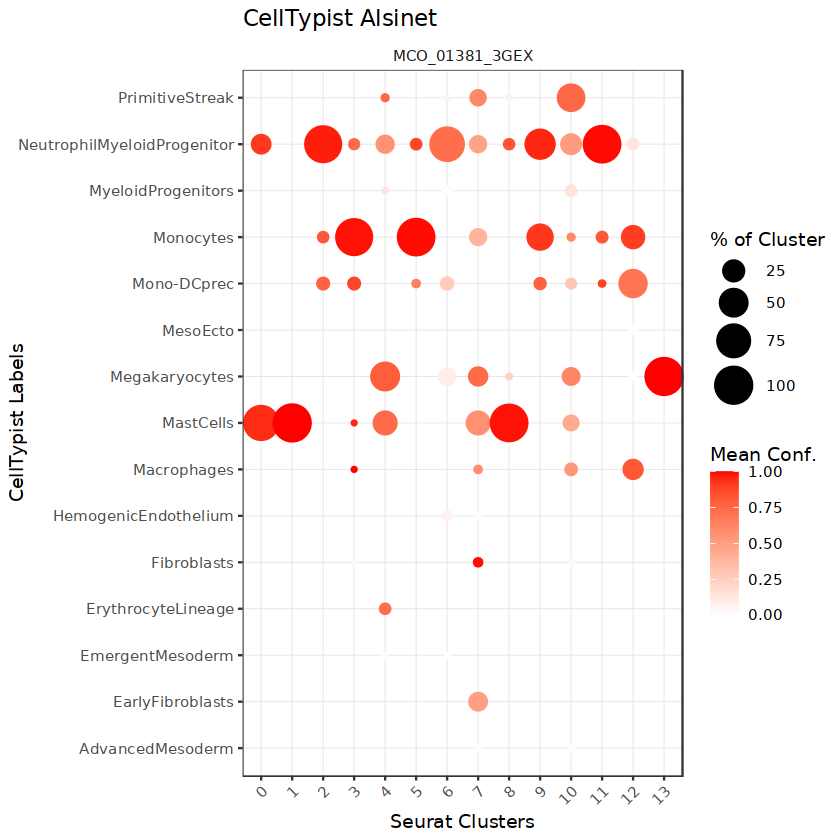

In [93]:

# 1. Sort clusters numerically for the X-axis
summary_final$seurat_clusters <- factor(summary_final$seurat_clusters, 
                                        levels = sort(as.numeric(unique(summary_final$seurat_clusters))))

# 2. Create the Dot Plot
dotplot_annotation <- ggplot(summary_final, aes(x = seurat_clusters, 
                                                y = CellTypist_label_Alsinet)) +
  # Use geom_point where size and color represent your calculated metrics
  geom_point(aes(size = percentage, color = mean_conf_score)) +
  
  # Set the color gradient from white to red
  # limits c(0,1) ensures the scale is consistent for confidence scores
  scale_color_gradient(low = "white", high = "red", limits = c(0, 1), name = "Mean Conf.") +
  
  # Adjust the size scale to make dots visible but not overlapping
  scale_size_continuous(range = c(1, 10), name = "% of Cluster") +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = "free_x", space = "free_x") +
  
  # Clean theme and labels
  theme_bw() +
  labs(
    title = "CellTypist Alsinet",
    x = "Seurat Clusters",
    y = "CellTypist Labels"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_line(linewidth = 0.2, color = "grey90"),
    strip.background = element_blank(),
    legend.position = "right"
  )

# Display plot
dotplot_annotation

In [94]:
setwd(path_graphs)

svgname<-paste("Dot_plot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot_annotation,
         device="svg", width =13, height = 13)
}

# Read FBMA cell typist prediction

In [95]:
setwd("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/")

In [96]:
cell_typist<-read.csv(file="FBMA_celltypist_prediction.csv")

In [97]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [98]:
str(row.names(cell_typist))

 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [99]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [100]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [101]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	9457 obs. of  2 variables:
 $ predicted_labels: chr  "late erythroid" "GMP" "DC3" "promyelocyte" ...
 $ conf_score      : num  0.416 0.291 0.187 0.484 0.568 ...
 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [102]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_FBMA'
)

In [103]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_FBMA'
)

## UMAPS of FBMA

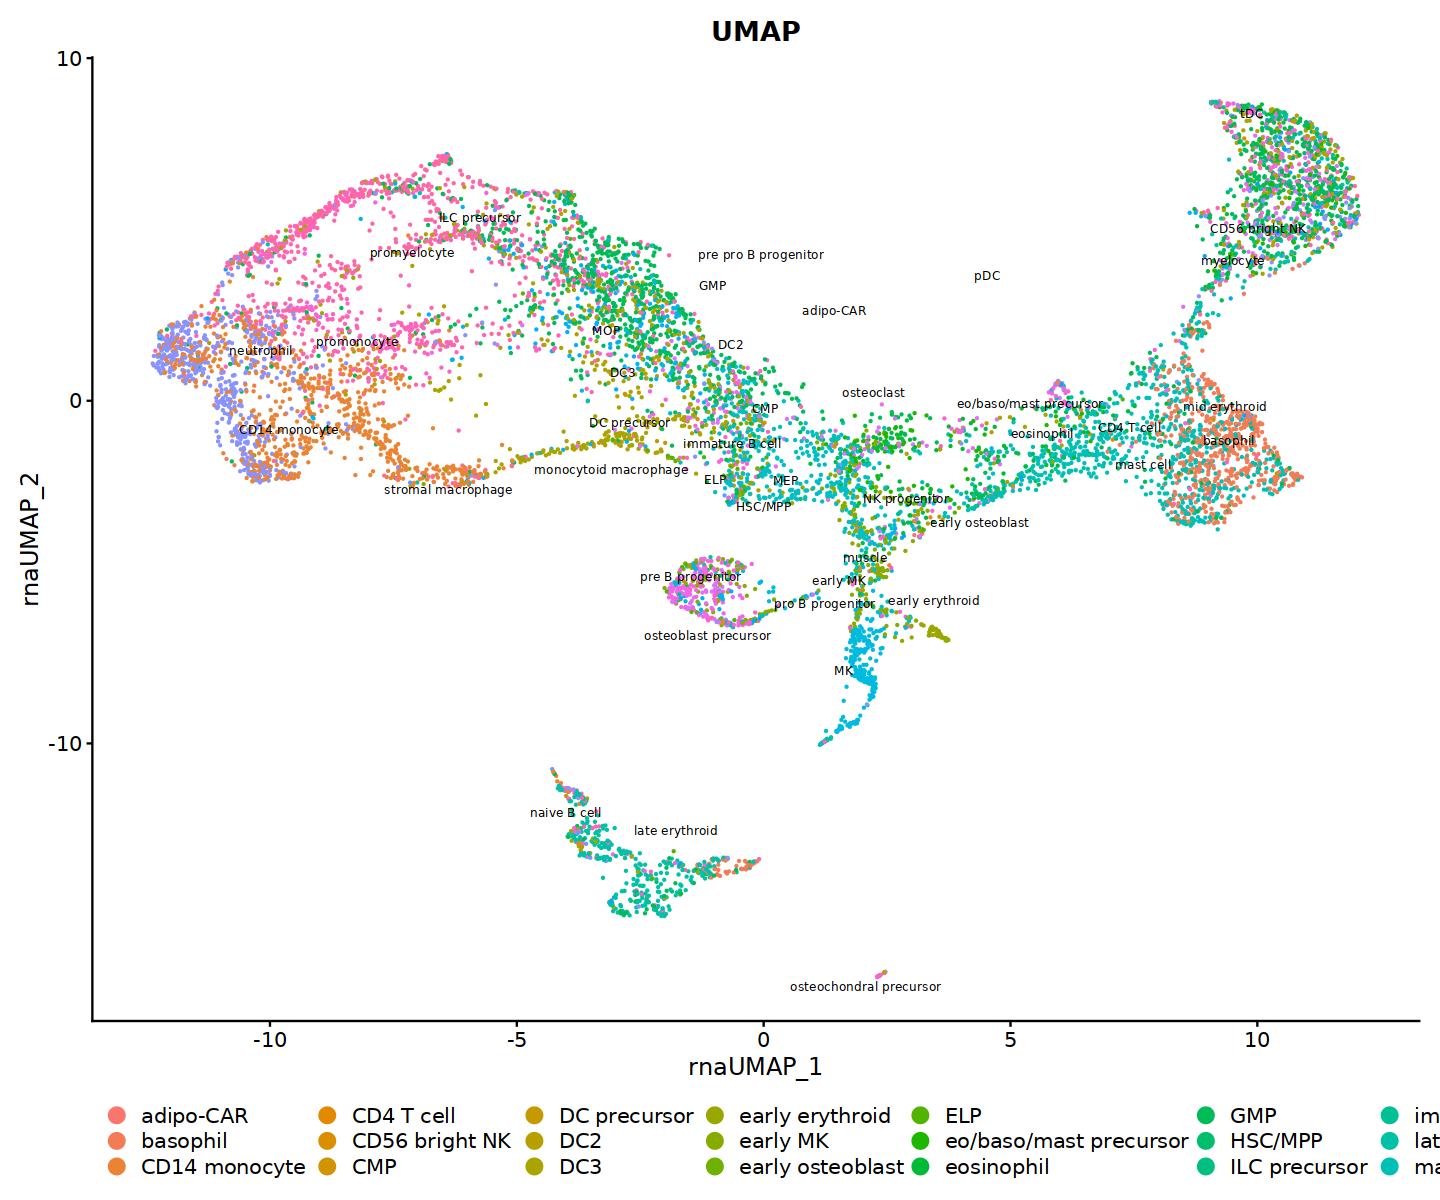

In [104]:
# Increase width to give the legend space at the bottom
options(repr.plot.width = 12, repr.plot.height = 10)

p3 <- DimPlot(adata, 
              reduction = "umap.rna", 
              group.by = "CellTypist_label_FBMA", 
              label = TRUE, 
              label.size = 2.5, 
              repel = TRUE) + 
      ggtitle("UMAP") +
      theme(legend.position = "bottom") +
      # Optional: arrange legend in rows if you have many labels
      guides(color = guide_legend(nrow = 3, override.aes = list(size = 4)))

p3

In [105]:
## Graph UMAP by CellTypist_label_filtered

setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_FBMA.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

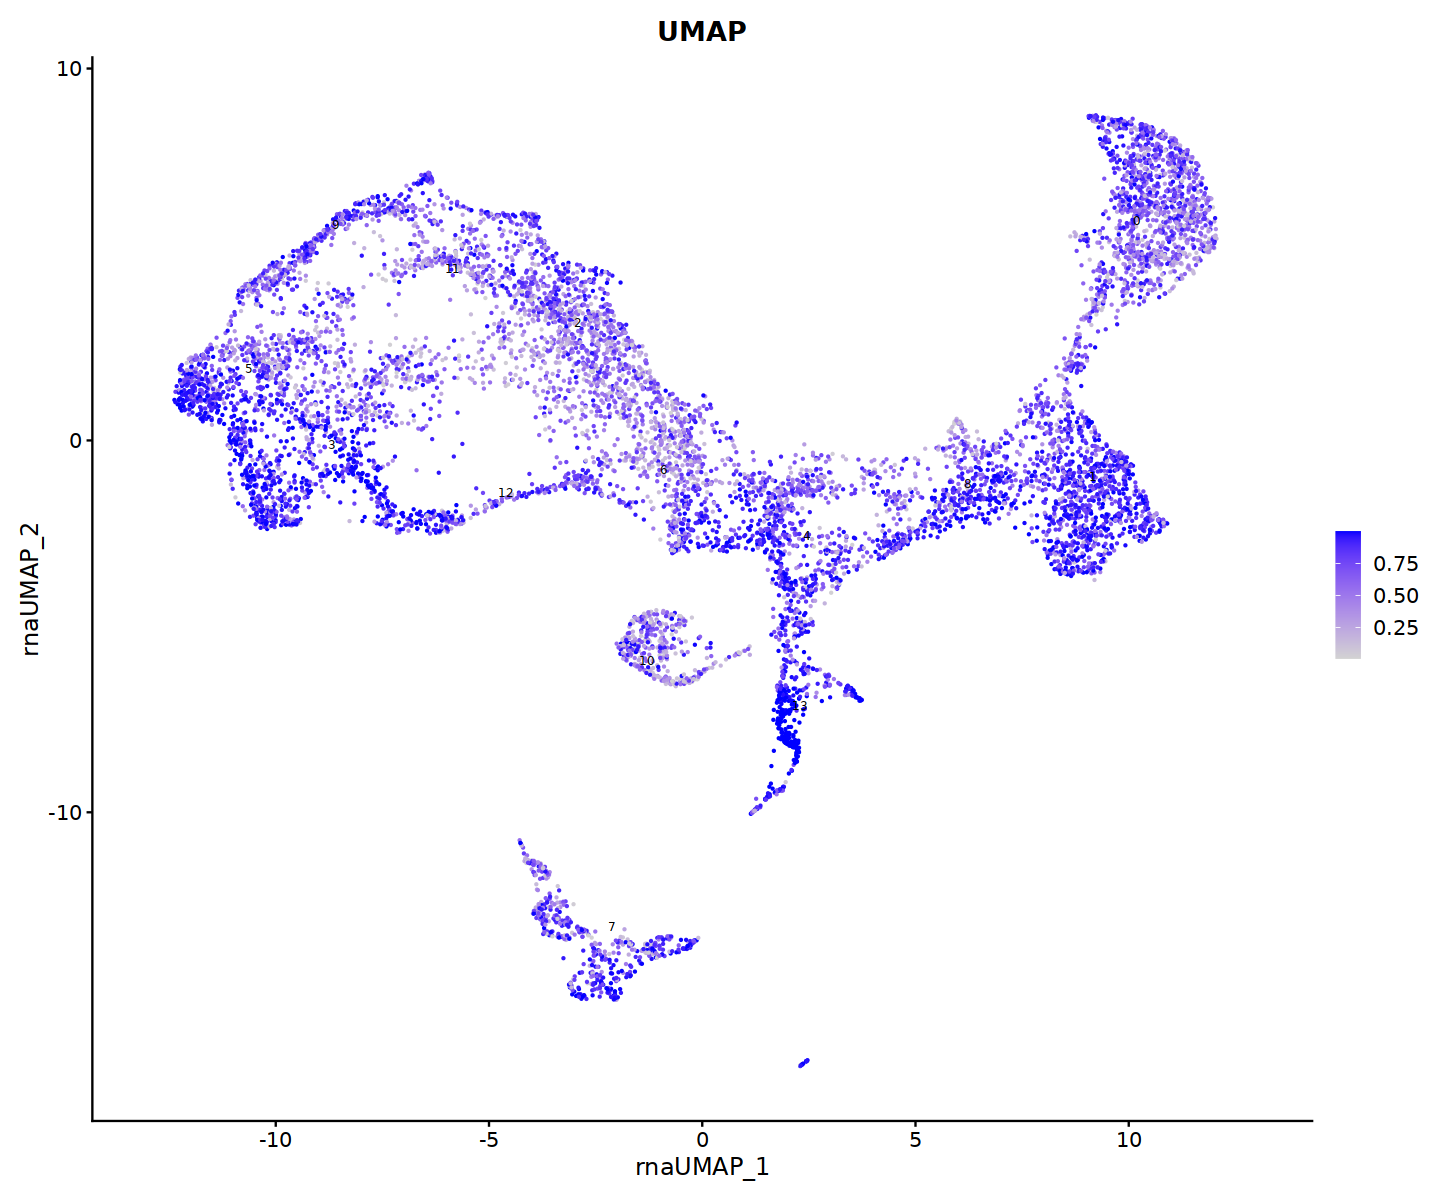

In [106]:
## Graph UMAP by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.rna", 
              features = "CellTypist_conf_score_FBMA", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("UMAP")

p3



In [107]:
setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_FBMA_CONF_SCORE.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Barplot of clusters

In [108]:
met<-adata[[]]

In [109]:
colnames(met)

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "nCount_RNA_raw"               
 [5] "nFeature_RNA_raw"              "percent.mt"                   
 [7] "scDblFinder.class"             "scDblFinder.score"            
 [9] "scDblFinder.weighted"          "scDblFinder.cxds_score"       
[11] "Diff"                          "nCount_SCT"                   
[13] "nFeature_SCT"                  "SCT_snn_res.2"                
[15] "seurat_clusters"               "SCT_snn_res.0.5"              
[17] "CellTypist_label_Alsinet"      "CellTypist_conf_score_Alsinet"
[19] "CellTypist_label_FBMA"         "CellTypist_conf_score_FBMA"

In [110]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_FBMA",'orig.ident'))

In [111]:
#str(met.dt)

In [112]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [113]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [114]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [115]:
str(Freq.table)

'data.frame':	269 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 14 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_FBMA: chr  "CD56 bright NK" "DC2" "DC3" "ELP" ...
 $ Freq                 : int  5 45 122 1 490 1 5 1 6 7 ...
 $ TOTAL                : int  1296 1296 1296 1296 1296 1296 1296 1296 1296 1296 ...
 $ Perc                 : num  0.39 3.47 9.41 0.08 37.81 ...


In [116]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  170.0   477.0   695.0   706.5   879.0  1296.0 

In [117]:
met.dt<-data.table(met, key=c("CellTypist_label_FBMA"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_FBMA=.N),by=key(met.dt)], stringsAsFactors=F)



In [118]:
str(Freq.table_CT_annotation)

'data.frame':	42 obs. of  2 variables:
 $ CellTypist_label_FBMA     : chr  "CD14 monocyte" "CD4 T cell" "CD56 bright NK" "CMP" ...
 $ Freq_CellTypist_label_FBMA: int  800 1 7 15 28 137 632 55 1485 12 ...


### Filter x axis by frequency

In [119]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	269 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 14 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_FBMA: chr  "CD56 bright NK" "DC2" "DC3" "ELP" ...
 $ Freq                 : int  5 45 122 1 490 1 5 1 6 7 ...
 $ TOTAL                : int  1296 1296 1296 1296 1296 1296 1296 1296 1296 1296 ...
 $ Perc                 : num  0.39 3.47 9.41 0.08 37.81 ...


In [120]:
# 1. Identify how many unique labels you actually have
n_labels <- length(unique(Freq.table_filtered$CellTypist_label_FBMA))

# 2. Create a large palette (42+ colors)
# We combine several palettes and use colorRampPalette to fill the gaps
get_big_palette <- colorRampPalette(c(
  brewer.pal(9, "Set1"), 
  brewer.pal(12, "Set3"), 
  brewer.pal(8, "Dark2"),
  brewer.pal(8, "Accent")
))

vector_colors_CellTypist_label_FBMA <- get_big_palette(n_labels)

-------------------------------------->	0 25 50 75 100


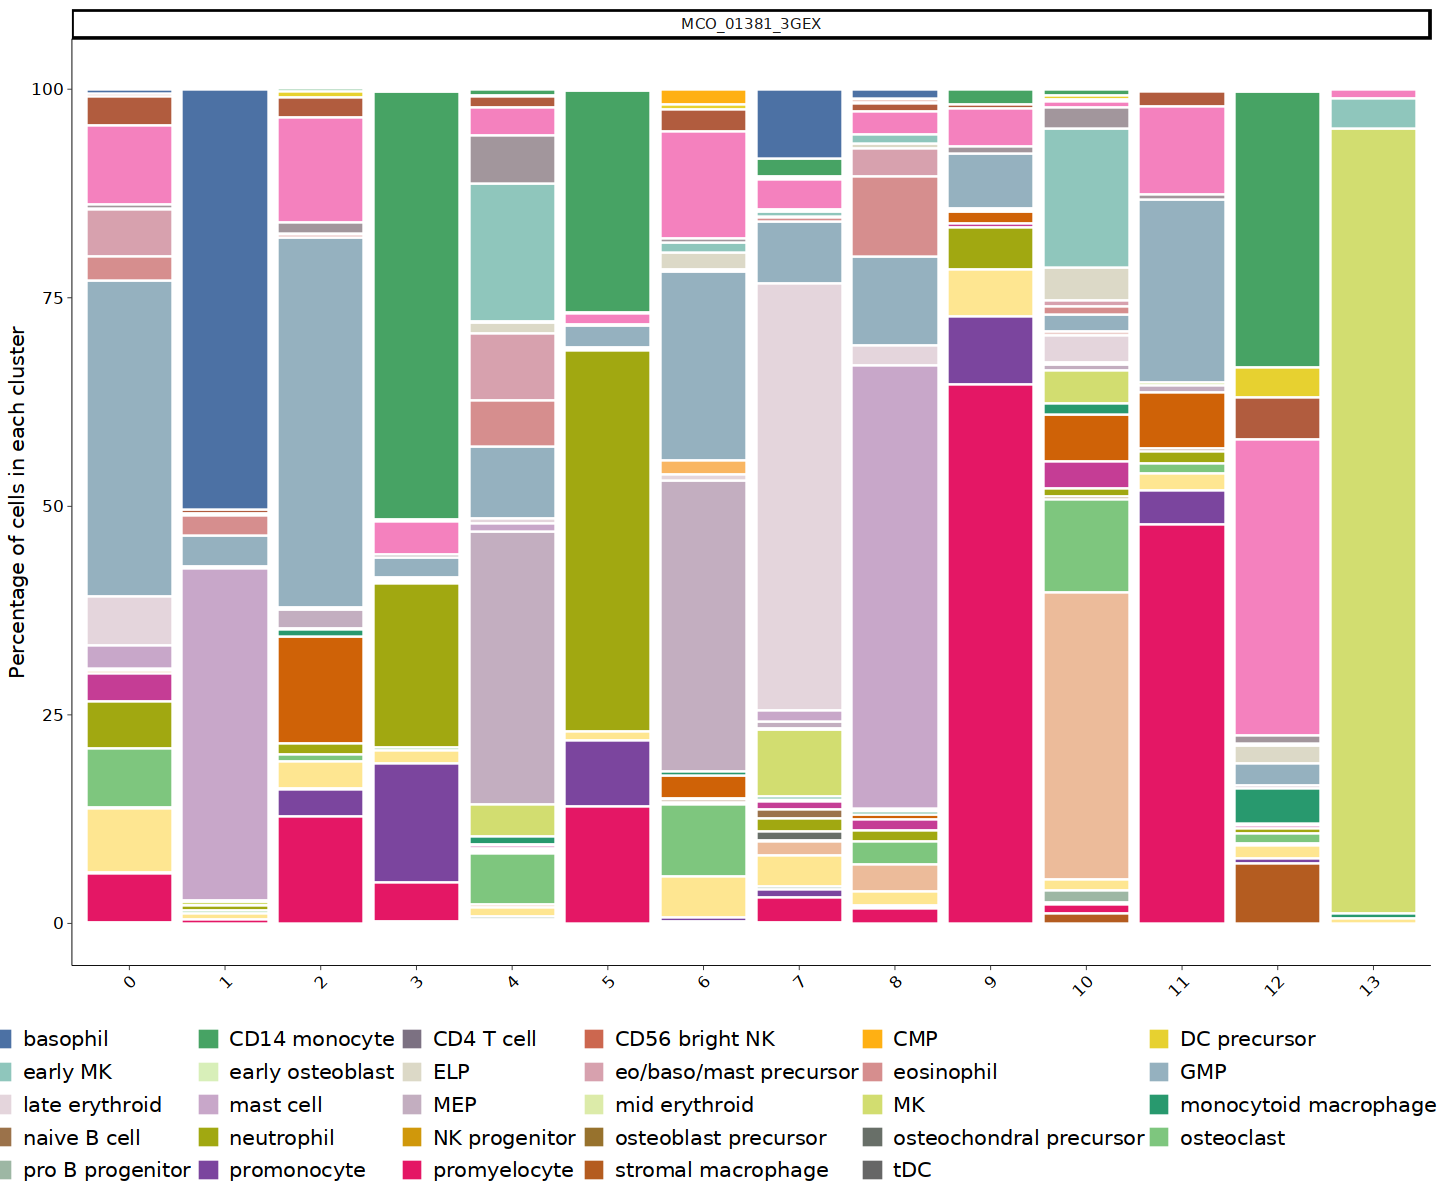

In [121]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_FBMA)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_FBMA,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))



stacked_barplot
  




  

In [122]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_FBMA_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Violin plot of confidence score

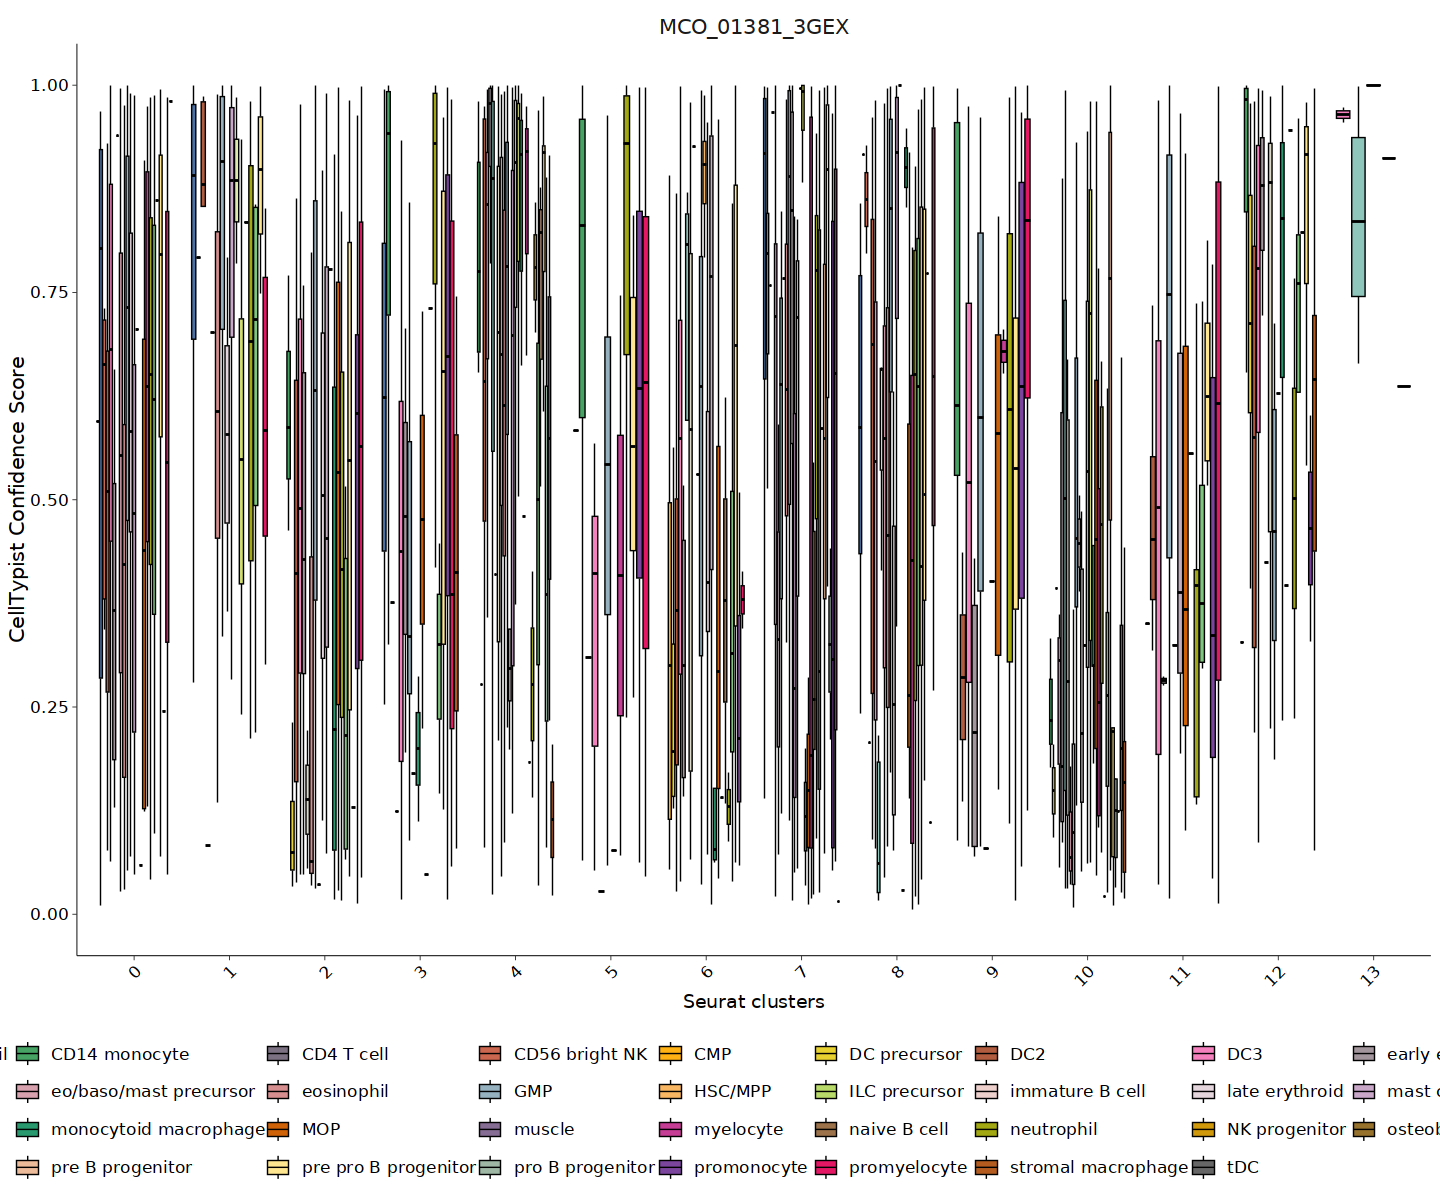

In [123]:
library(ggplot2)
library(RColorBrewer)

# 1. Define color vector
vector_colors_CellTypist_label_FBMA <- vector_colors_CellTypist_label_FBMA

# 2. Build the Plot (Boxplot only)
boxplot_only_plot <- ggplot(met, aes(x = seurat_clusters, 
                                     y = CellTypist_conf_score_FBMA, 
                                     fill = CellTypist_label_FBMA)) +
  
  # Grouped boxplots without outliers
  # width = 0.7 gives them more horizontal space since the violins are gone
  geom_boxplot(width = 0.7, 
               color = "black", 
               linewidth = 0.3,
               outlier.shape = NA, 
               position = position_dodge(width = 0.8)) +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = 'free_x', space = 'free_x') +
  
  # Manual colors and drop unused labels from legend
  scale_fill_manual(values = vector_colors_CellTypist_label_FBMA,
                    drop = TRUE, 
                    name = "Alsinet label") +
  
  # Ensure X-axis drops empty clusters
  scale_x_discrete(name = "Seurat clusters", drop = TRUE) +
  
  # Standardize Y-axis for confidence scores
  scale_y_continuous(limits = c(0, 1)) +
  
  labs(y = "CellTypist Confidence Score") +
  
  # Applying your requested theme styling
  theme_classic() +
  theme(
    strip.background = element_blank(),
    strip.text = element_text(size = 12),
    axis.title.y = element_text(size = 12, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    axis.text.x = element_text(angle = 45, size = 10, vjust = 1, hjust = 1, color = "black"),
    axis.line = element_line(linewidth = 0.2),
    axis.ticks = element_line(linewidth = 0.2),
    legend.position = "bottom",
    legend.text = element_text(size = 10),
    legend.title = element_blank()
  ) +
  guides(fill = guide_legend(nrow = 4, byrow = TRUE))

print(boxplot_only_plot)

In [124]:
setwd(path_graphs)

svgname<-paste("Violin_plot_FBMA_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= boxplot_only_plot,
         device="svg", width =13, height = 13)
}

## Dot plot

In [125]:
summary_means <- met %>%
  group_by(orig.ident, seurat_clusters, CellTypist_label_FBMA) %>%
  dplyr::summarise(
    mean_conf_score = mean(CellTypist_conf_score_FBMA, na.rm = TRUE),
    cell_count = n(),
    .groups = "drop" # This replaces the need for ungroup()
  )

# View results
head(summary_means)

orig.ident     seurat_clusters CellTypist_label_FBMA mean_conf_score
1 MCO_01381_3GEX 0               CD56 bright NK        0.5669592      
2 MCO_01381_3GEX 0               DC2                   0.4858475      
3 MCO_01381_3GEX 0               DC3                   0.6440740      
4 MCO_01381_3GEX 0               ELP                   0.9387490      
5 MCO_01381_3GEX 0               GMP                   0.6773859      
6 MCO_01381_3GEX 0               MEP                   0.7054629      
  cell_count
1   5       
2  45       
3 122       
4   1       
5 490       
6   1

In [126]:
library(dplyr)

summary_final <- summary_means %>%
  # 1. Force the columns to characters to be safe
  mutate(
    seurat_clusters = as.character(seurat_clusters),
    orig.ident = as.character(orig.ident)
  ) %>%
  # 2. Use the explicit dplyr group_by
  dplyr::group_by(orig.ident, seurat_clusters) %>%
  # 3. Use the explicit dplyr mutate
  dplyr::mutate(
    cluster_total = sum(cell_count),
    percentage = (cell_count / cluster_total) * 100
  ) %>%
  dplyr::ungroup()

# VERIFICATION: This should now show ~1296 for Cluster 0


In [127]:
summary_final %>% filter(seurat_clusters == "0")
cat("\n")

summary_final %>% filter(seurat_clusters == "2")
cat("\n")

orig.ident     seurat_clusters CellTypist_label_FBMA  mean_conf_score
1  MCO_01381_3GEX 0               CD56 bright NK         0.56695920     
2  MCO_01381_3GEX 0               DC2                    0.48584747     
3  MCO_01381_3GEX 0               DC3                    0.64407401     
4  MCO_01381_3GEX 0               ELP                    0.93874905     
5  MCO_01381_3GEX 0               GMP                    0.67738594     
6  MCO_01381_3GEX 0               MEP                    0.70546292     
7  MCO_01381_3GEX 0               MOP                    0.45857729     
8  MCO_01381_3GEX 0               adipo-CAR              0.59446428     
9  MCO_01381_3GEX 0               basophil               0.60984275     
10 MCO_01381_3GEX 0               early erythroid        0.36621258     
11 MCO_01381_3GEX 0               eo/baso/mast precursor 0.53848728     
12 MCO_01381_3GEX 0               eosinophil             0.41729396     
13 MCO_01381_3GEX 0               late erythroid         0.60998500     
14 MCO_01381_3GEX 0               mast cell              0.46616068     
15 MCO_01381_3GEX 0               mid erythroid          0.05939317     
16 MCO_01381_3GEX 0               myelocyte              0.63195169     
17 MCO_01381_3GEX 0               neutrophil             0.62134835     
18 MCO_01381_3GEX 0               osteoclast             0.59275583     
19 MCO_01381_3GEX 0               pDC                    0.86104968     
20 MCO_01381_3GEX 0               pre pro B progenitor   0.71106462     
21 MCO_01381_3GEX 0               pro B progenitor       0.24510874     
22 MCO_01381_3GEX 0               promyelocyte           0.57566604     
23 MCO_01381_3GEX 0               tDC                    0.98066073     
   cell_count cluster_total percentage 
1    5        1296           0.38580247
2   45        1296           3.47222222
3  122        1296           9.41358025
4    1        1296           0.07716049
5  490        1296          37.80864198
6    1        1296           0.07716049
7    5        1296           0.38580247
8    1        1296           0.07716049
9    6        1296           0.46296296
10   7        1296           0.54012346
11  73        1296           5.63271605
12  38        1296           2.93209877
13  77        1296           5.94135802
14  36        1296           2.77777778
15   1        1296           0.07716049
16  44        1296           3.39506173
17  73        1296           5.63271605
18  91        1296           7.02160494
19   1        1296           0.07716049
20 100        1296           7.71604938
21   1        1296           0.07716049
22  77        1296           5.94135802
23   1        1296           0.07716049

orig.ident     seurat_clusters CellTypist_label_FBMA mean_conf_score
1  MCO_01381_3GEX 2               CD14 monocyte         0.60682746     
2  MCO_01381_3GEX 2               DC precursor          0.10265594     
3  MCO_01381_3GEX 2               DC2                   0.39874960     
4  MCO_01381_3GEX 2               DC3                   0.50454302     
5  MCO_01381_3GEX 2               ELP                   0.13816191     
6  MCO_01381_3GEX 2               GMP                   0.60501664     
7  MCO_01381_3GEX 2               MEP                   0.51738195     
8  MCO_01381_3GEX 2               MK                    0.77810674     
9  MCO_01381_3GEX 2               MOP                   0.52097106     
10 MCO_01381_3GEX 2               early erythroid       0.43868861     
11 MCO_01381_3GEX 2               eosinophil            0.29911672     
12 MCO_01381_3GEX 2               immature B cell       0.03543656     
13 MCO_01381_3GEX 2               late erythroid        0.50489149     
14 MCO_01381_3GEX 2               monocytoid macrophage 0.36644278     
15 MCO_01381_3GEX 2               neutrophil            0.41459725     
16 MCO_01381_3GEX 2               osteoclast            0.25712653     
17 MCO_01381_3GEX 2               pre pro B progenitor  0.51827456     
18 MCO_01381_3GEX 2               pro B progenitor      0.12899111     
19 MCO_01381_3GEX 2               promonocyte           0.52910656     
20 MCO_01381_3GEX 2               promyelocyte          0.57127533     
   cell_count cluster_total percentage 
1    3        1035           0.28985507
2    7        1035           0.67632850
3   25        1035           2.41545894
4  131        1035          12.65700483
5    2        1035           0.19323671
6  459        1035          44.34782609
7   23        1035           2.22222222
8    1        1035           0.09661836
9  133        1035          12.85024155
10  13        1035           1.25603865
11   3        1035           0.28985507
12   1        1035           0.09661836
13   2        1035           0.19323671
14   9        1035           0.86956522
15  13        1035           1.25603865
16   9        1035           0.86956522
17  34        1035           3.28502415
18   1        1035           0.09661836
19  33        1035           3.18840580
20 133        1035          12.85024155

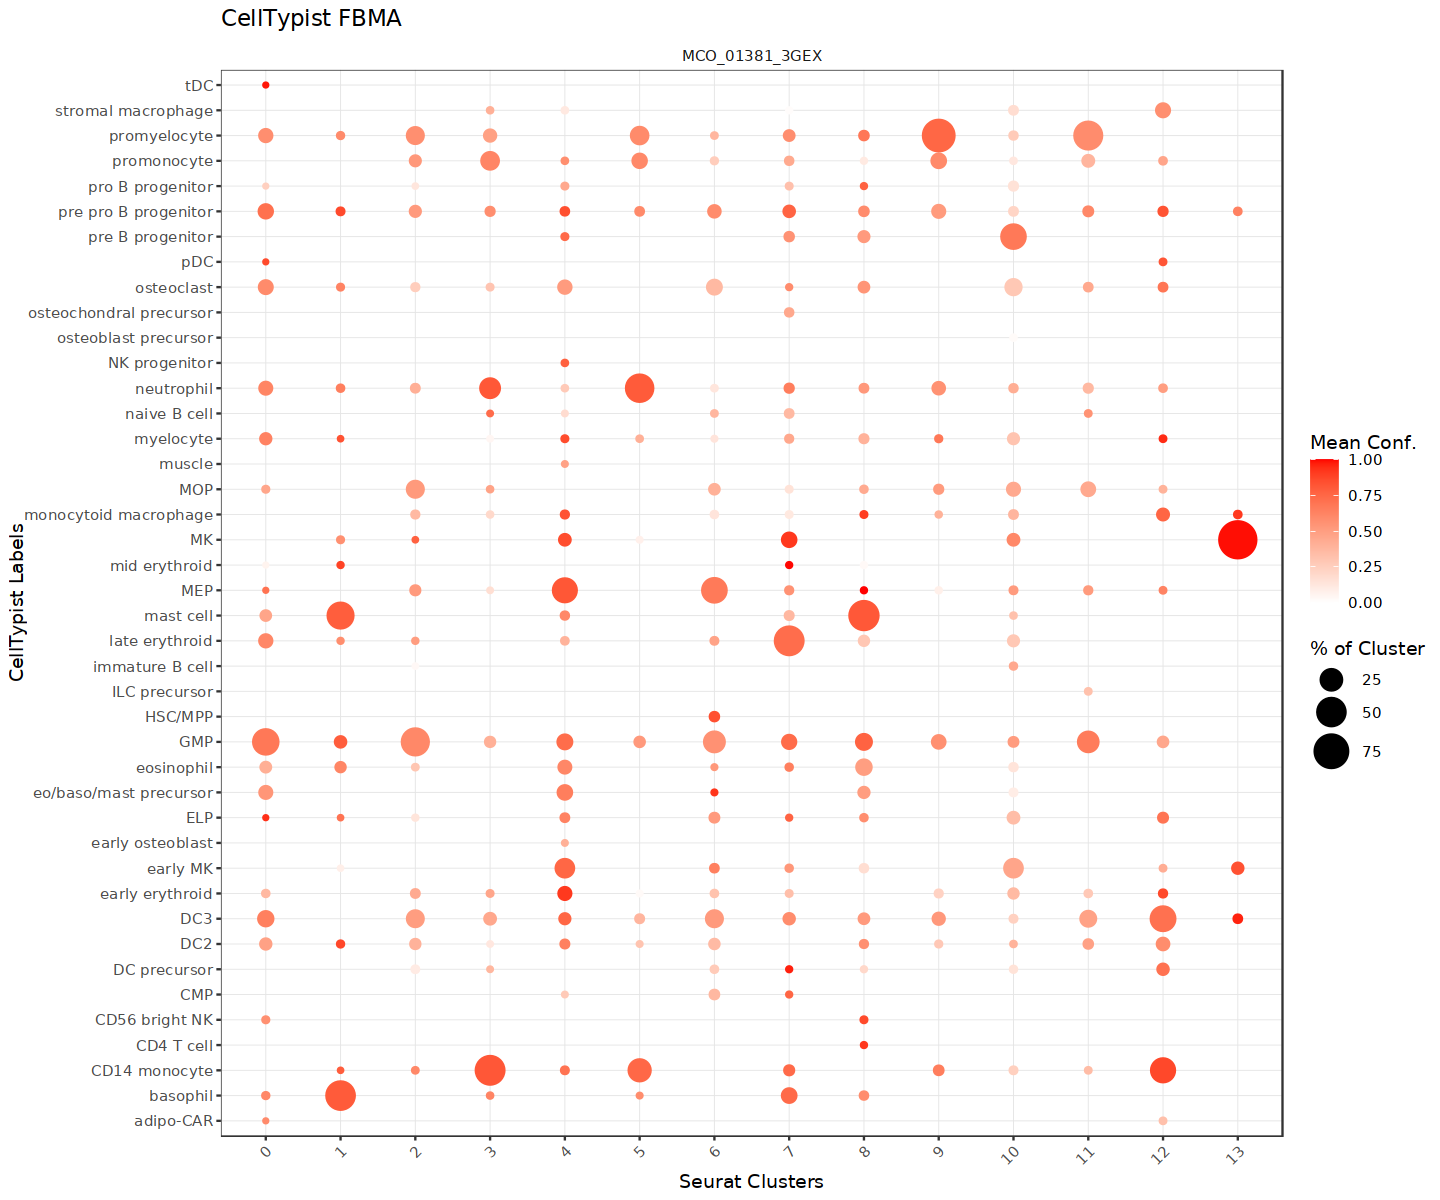

In [128]:

# 1. Sort clusters numerically for the X-axis
summary_final$seurat_clusters <- factor(summary_final$seurat_clusters, 
                                        levels = sort(as.numeric(unique(summary_final$seurat_clusters))))

# 2. Create the Dot Plot
dotplot_annotation <- ggplot(summary_final, aes(x = seurat_clusters, 
                                                y = CellTypist_label_FBMA)) +
  # Use geom_point where size and color represent your calculated metrics
  geom_point(aes(size = percentage, color = mean_conf_score)) +
  
  # Set the color gradient from white to red
  # limits c(0,1) ensures the scale is consistent for confidence scores
  scale_color_gradient(low = "white", high = "red", limits = c(0, 1), name = "Mean Conf.") +
  
  # Adjust the size scale to make dots visible but not overlapping
  scale_size_continuous(range = c(1, 10), name = "% of Cluster") +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = "free_x", space = "free_x") +
  
  # Clean theme and labels
  theme_bw() +
  labs(
    title = "CellTypist FBMA",
    x = "Seurat Clusters",
    y = "CellTypist Labels"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_line(linewidth = 0.2, color = "grey90"),
    strip.background = element_blank(),
    legend.position = "right"
  )

# Display plot
dotplot_annotation

In [129]:
setwd(path_graphs)

svgname<-paste("Dot_plot_FBMA_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot_annotation,
         device="svg", width =13, height = 13)
}

# Read Immune_ALL_low cell typist prediction

In [130]:
setwd("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/")

In [131]:
cell_typist<-read.csv(file="Immune_ALL_low_celltypist_prediction.csv")

In [132]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [133]:
str(row.names(cell_typist))

 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [134]:
colnames(cell_typist)

[1] "cell_barcode"           "orig.ident"             "nCount_RNA"            
 [4] "nFeature_RNA"           "nCount_RNA_raw"         "nFeature_RNA_raw"      
 [7] "percent.mt"             "scDblFinder.class"      "scDblFinder.score"     
[10] "scDblFinder.weighted"   "scDblFinder.cxds_score" "Diff"                  
[13] "nCount_SCT"             "nFeature_SCT"           "SCT_snn_res.2"         
[16] "seurat_clusters"        "SCT_snn_res.0.5"        "n_counts"              
[19] "predicted_labels"       "conf_score"

In [135]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [136]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	9457 obs. of  2 variables:
 $ predicted_labels: chr  "Double-positive thymocytes" "Neutrophil-myeloid progenitor" "HSC/MPP" "Neutrophil-myeloid progenitor" ...
 $ conf_score      : num  0.245 1 0.969 0.995 0.998 ...
 chr [1:9457] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [137]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Immune_ALL_low'
)

In [138]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Immune_ALL_low'
)

## UMAPS of Immune_ALL_low

Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


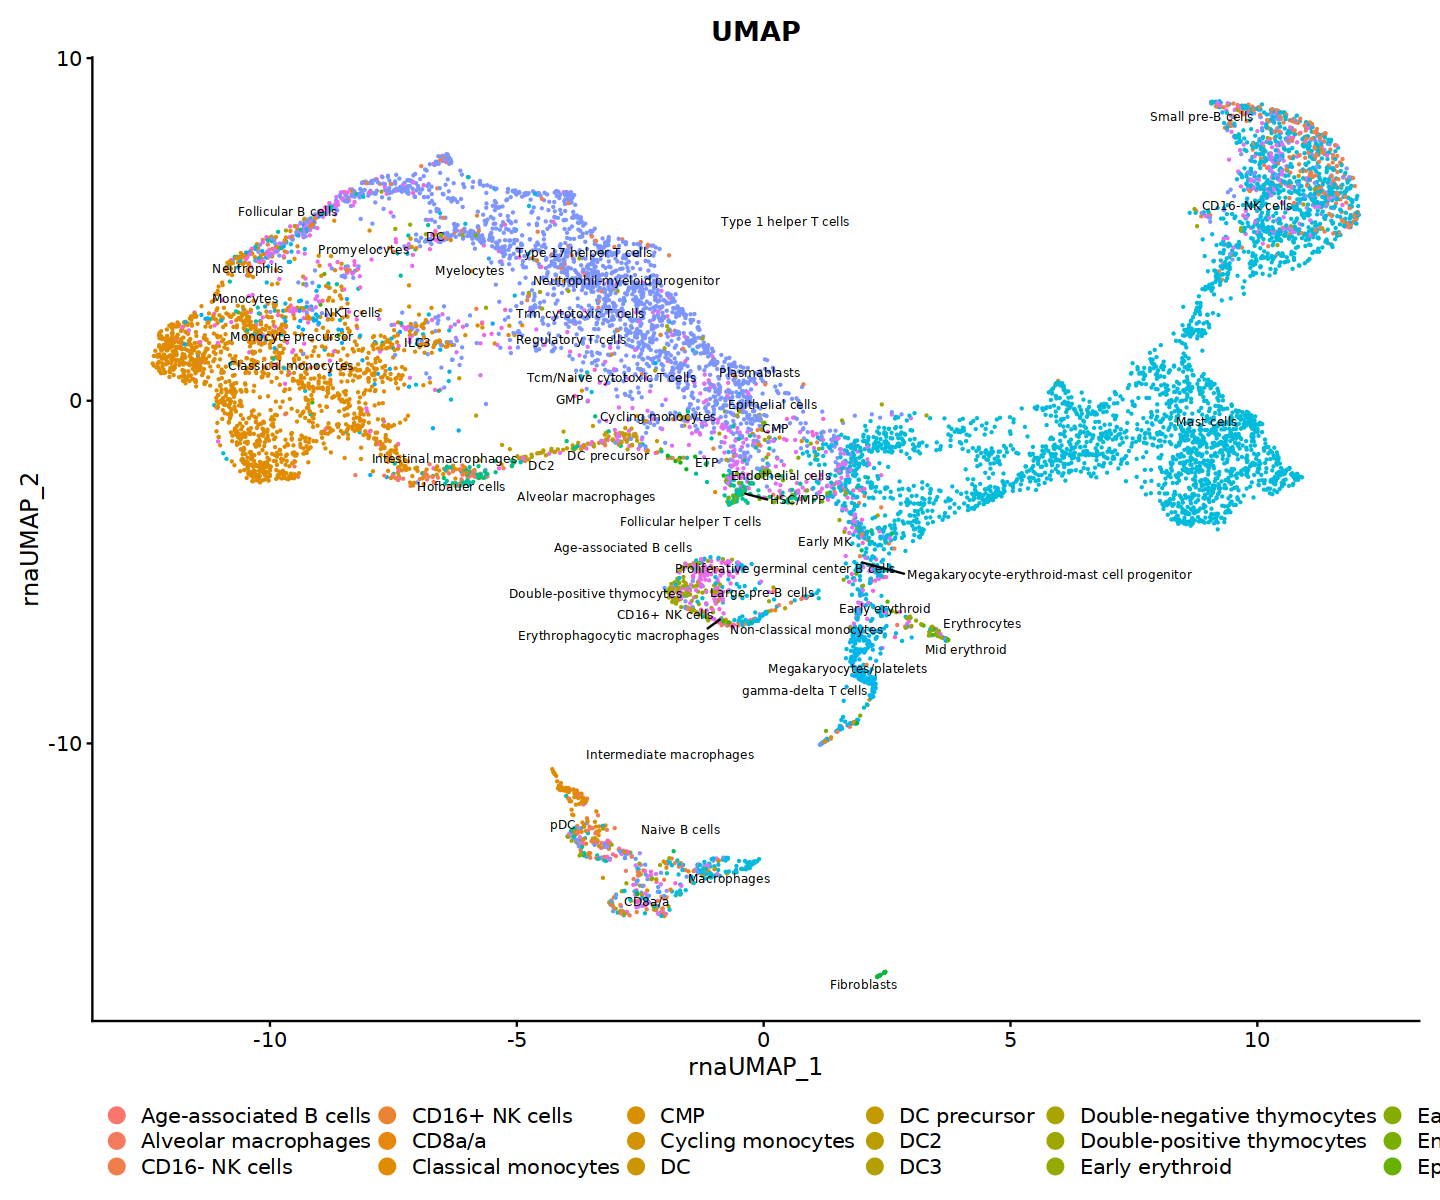

In [139]:
# Increase width to give the legend space at the bottom
options(repr.plot.width = 12, repr.plot.height = 10)

p3 <- DimPlot(adata, 
              reduction = "umap.rna", 
              group.by = "CellTypist_label_Immune_ALL_low", 
              label = TRUE, 
              label.size = 2.5, 
              repel = TRUE) + 
      ggtitle("UMAP") +
      theme(legend.position = "bottom") +
      # Optional: arrange legend in rows if you have many labels
      guides(color = guide_legend(nrow = 3, override.aes = list(size = 4)))

p3

In [140]:
## Graph UMAP by CellTypist_label_filtered

setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_Immune_ALL_low.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

Warning message:
"ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

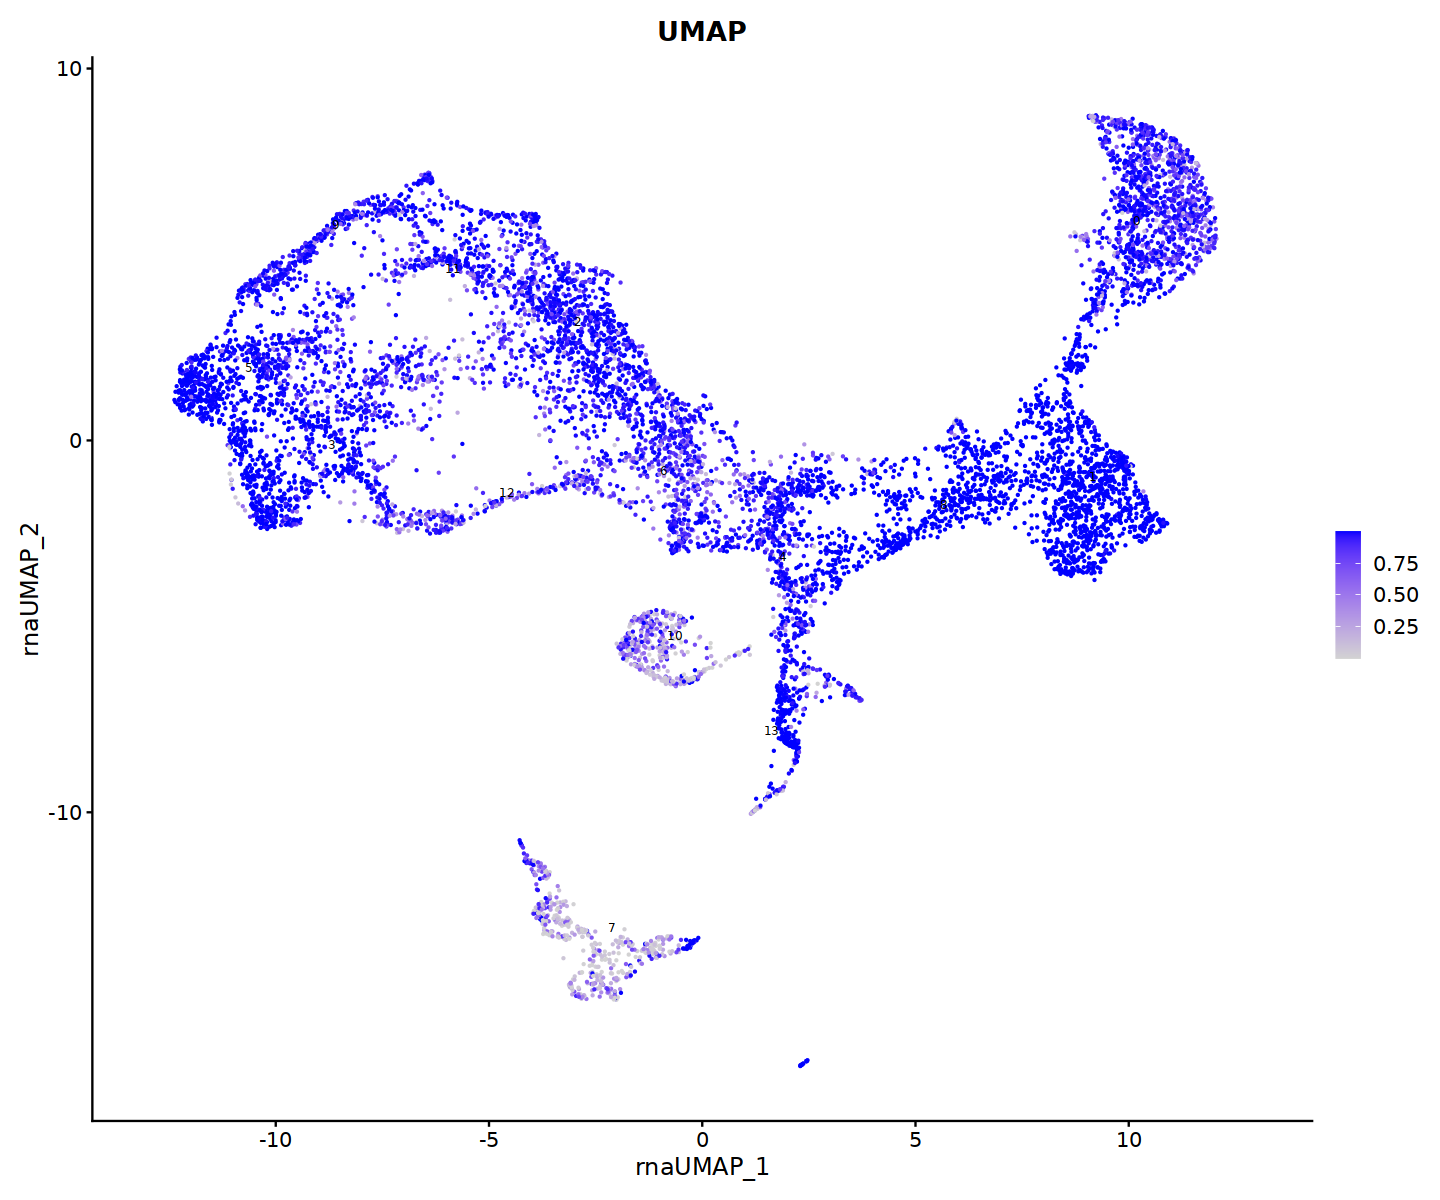

In [141]:
## Graph UMAP by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.rna", 
              features = "CellTypist_conf_score_Immune_ALL_low", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("UMAP")

p3



In [142]:
setwd(path_graphs)
png(file='UMAP_by_CellTypist_label_Immune_ALL_low_CONF_SCORE.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Barplot of clusters

In [143]:
met<-adata[[]]

In [144]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"

In [145]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_Immune_ALL_low",'orig.ident'))

In [146]:
#str(met.dt)

In [147]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [148]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [149]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [150]:
str(Freq.table)

'data.frame':	249 obs. of  6 variables:
 $ seurat_clusters                : Factor w/ 14 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident                     : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_Immune_ALL_low: chr  "Alveolar macrophages" "CD16+ NK cells" "CD16- NK cells" "Classical monocytes" ...
 $ Freq                           : int  2 6 214 1 2 9 831 86 120 1 ...
 $ TOTAL                          : int  1296 1296 1296 1296 1296 1296 1296 1296 1296 1296 ...
 $ Perc                           : num  0.15 0.46 16.51 0.08 0.15 ...


In [151]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  170.0   403.0   591.0   656.2   818.0  1296.0 

In [152]:
met.dt<-data.table(met, key=c("CellTypist_label_Immune_ALL_low"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_Immune_ALL_low=.N),by=key(met.dt)], stringsAsFactors=F)



In [153]:
str(Freq.table_CT_annotation)

'data.frame':	63 obs. of  2 variables:
 $ CellTypist_label_Immune_ALL_low     : chr  "Age-associated B cells" "Alveolar macrophages" "CD16+ NK cells" "CD16- NK cells" ...
 $ Freq_CellTypist_label_Immune_ALL_low: int  2 99 29 351 9 5 1656 1 14 61 ...


### Filter x axis by frequency

In [154]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	249 obs. of  6 variables:
 $ seurat_clusters                : Factor w/ 14 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident                     : chr  "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" "MCO_01381_3GEX" ...
 $ CellTypist_label_Immune_ALL_low: chr  "Alveolar macrophages" "CD16+ NK cells" "CD16- NK cells" "Classical monocytes" ...
 $ Freq                           : int  2 6 214 1 2 9 831 86 120 1 ...
 $ TOTAL                          : int  1296 1296 1296 1296 1296 1296 1296 1296 1296 1296 ...
 $ Perc                           : num  0.15 0.46 16.51 0.08 0.15 ...


In [155]:
# 1. Identify how many unique labels you actually have
n_labels <- length(unique(Freq.table_filtered$CellTypist_label_Immune_ALL_low))

# 2. Create a large palette (42+ colors)
# We combine several palettes and use colorRampPalette to fill the gaps
get_big_palette <- colorRampPalette(c(
  brewer.pal(9, "Set1"), 
  brewer.pal(12, "Set3"), 
  brewer.pal(8, "Dark2"),
  brewer.pal(8, "Accent")
))

vector_colors_CellTypist_label_Immune_ALL_low <- get_big_palette(n_labels)

-------------------------------------->	0 25 50 75 100


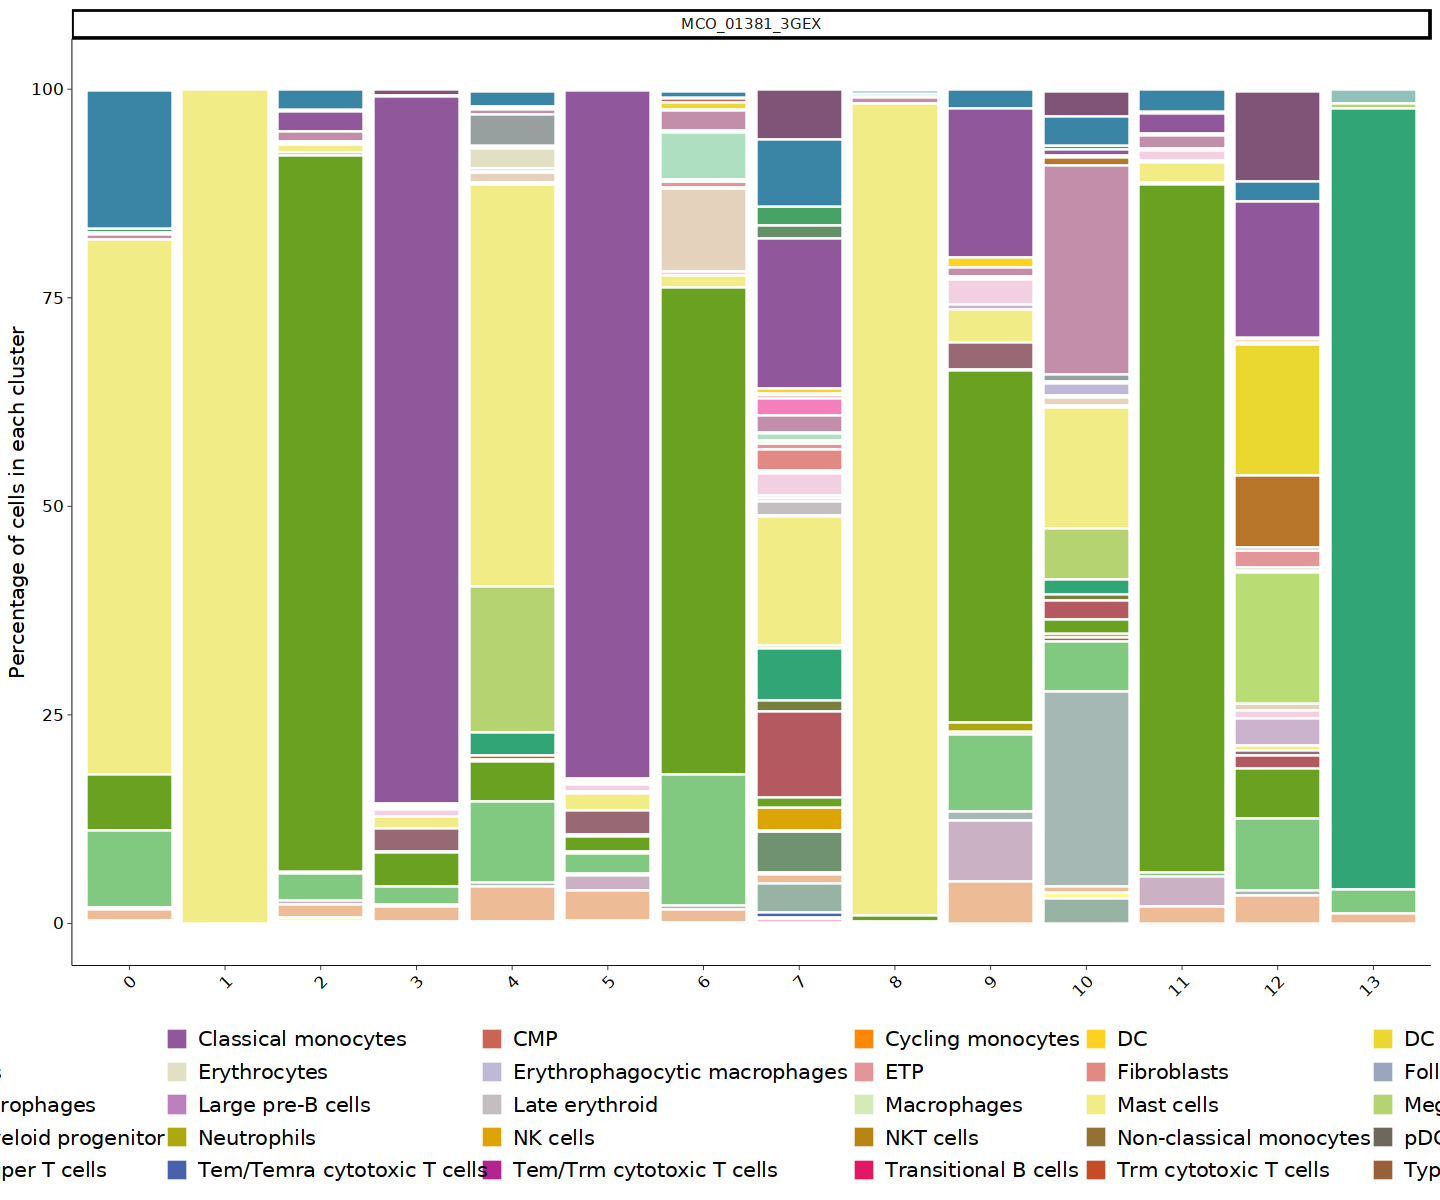

In [156]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_Immune_ALL_low)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_Immune_ALL_low,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))



stacked_barplot
  




  

In [157]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Immune_ALL_low_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Violin plot of confidence score

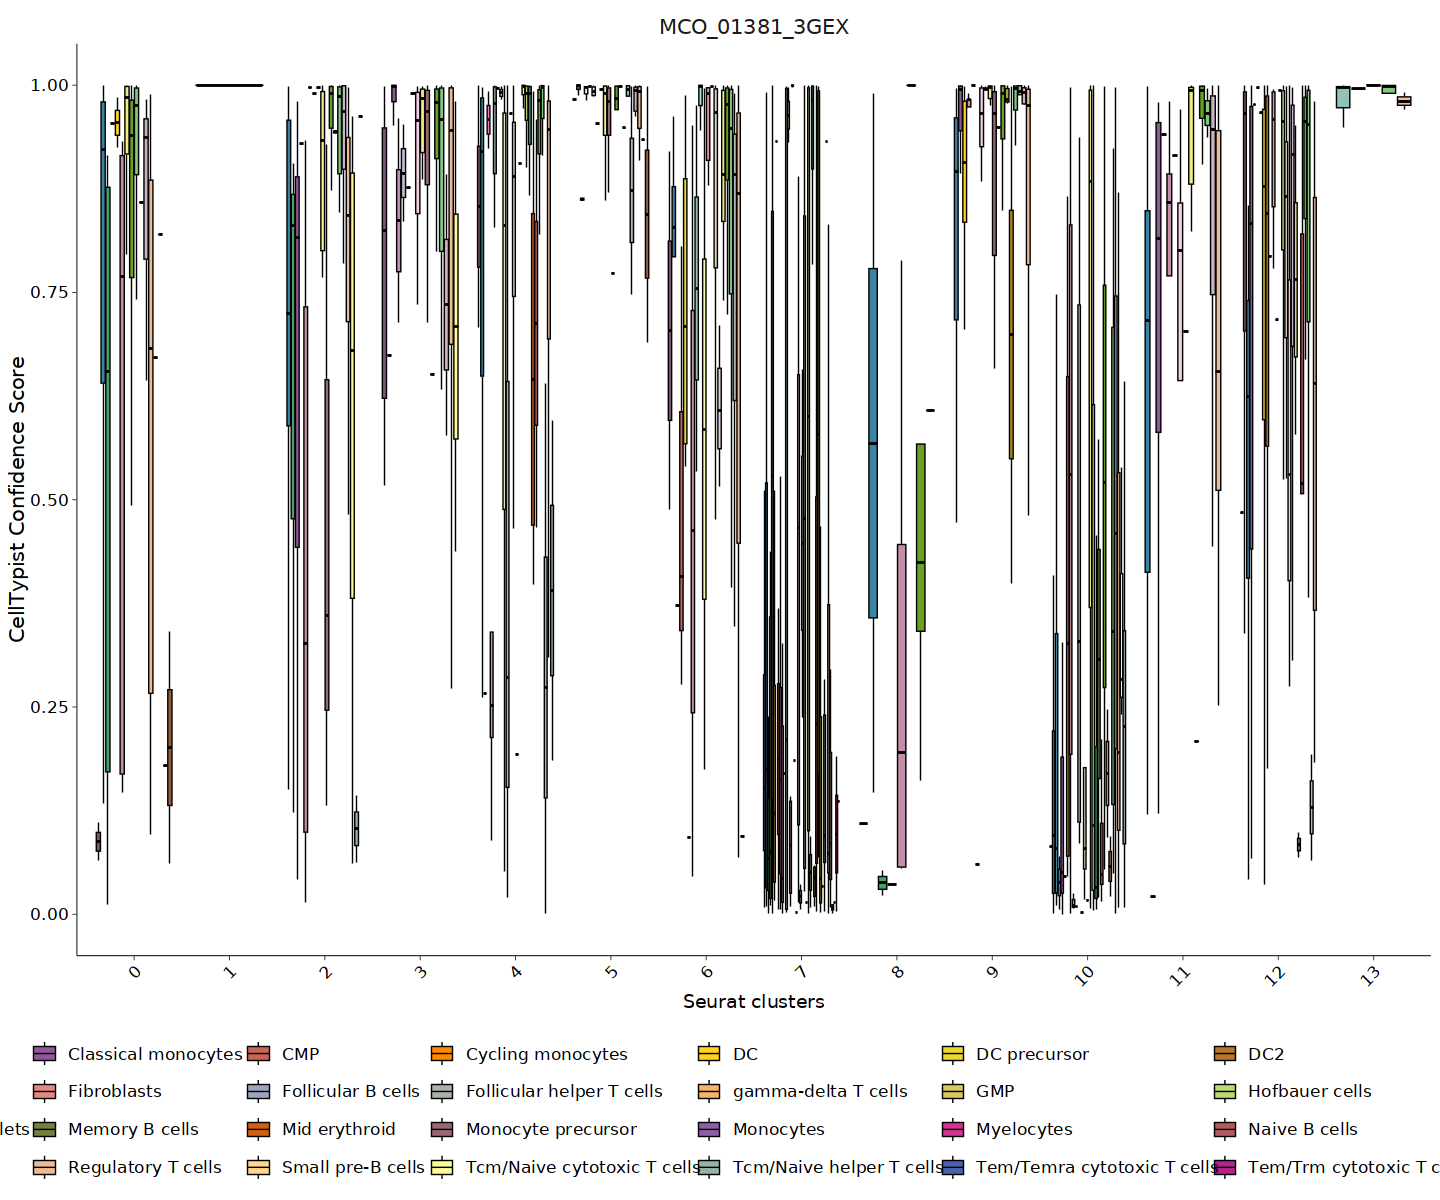

In [158]:
library(ggplot2)
library(RColorBrewer)

# 1. Define color vector
vector_colors_CellTypist_label_Immune_ALL_low <- vector_colors_CellTypist_label_Immune_ALL_low

# 2. Build the Plot (Boxplot only)
boxplot_only_plot <- ggplot(met, aes(x = seurat_clusters, 
                                     y = CellTypist_conf_score_Immune_ALL_low, 
                                     fill = CellTypist_label_Immune_ALL_low)) +
  
  # Grouped boxplots without outliers
  # width = 0.7 gives them more horizontal space since the violins are gone
  geom_boxplot(width = 0.7, 
               color = "black", 
               linewidth = 0.3,
               outlier.shape = NA, 
               position = position_dodge(width = 0.8)) +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = 'free_x', space = 'free_x') +
  
  # Manual colors and drop unused labels from legend
  scale_fill_manual(values = vector_colors_CellTypist_label_Immune_ALL_low,
                    drop = TRUE, 
                    name = "Alsinet label") +
  
  # Ensure X-axis drops empty clusters
  scale_x_discrete(name = "Seurat clusters", drop = TRUE) +
  
  # Standardize Y-axis for confidence scores
  scale_y_continuous(limits = c(0, 1)) +
  
  labs(y = "CellTypist Confidence Score") +
  
  # Applying your requested theme styling
  theme_classic() +
  theme(
    strip.background = element_blank(),
    strip.text = element_text(size = 12),
    axis.title.y = element_text(size = 12, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    axis.text.x = element_text(angle = 45, size = 10, vjust = 1, hjust = 1, color = "black"),
    axis.line = element_line(linewidth = 0.2),
    axis.ticks = element_line(linewidth = 0.2),
    legend.position = "bottom",
    legend.text = element_text(size = 10),
    legend.title = element_blank()
  ) +
  guides(fill = guide_legend(nrow = 4, byrow = TRUE))

print(boxplot_only_plot)

In [159]:
setwd(path_graphs)

svgname<-paste("Violin_plot_Immune_ALL_low_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= boxplot_only_plot,
         device="svg", width =13, height = 13)
}

## Dot plot

In [160]:
summary_means <- met %>%
  group_by(orig.ident, seurat_clusters, CellTypist_label_Immune_ALL_low) %>%
  dplyr::summarise(
    mean_conf_score = mean(CellTypist_conf_score_Immune_ALL_low, na.rm = TRUE),
    cell_count = n(),
    .groups = "drop" # This replaces the need for ungroup()
  )

# View results
head(summary_means)

orig.ident     seurat_clusters CellTypist_label_Immune_ALL_low
1 MCO_01381_3GEX 0               Alveolar macrophages           
2 MCO_01381_3GEX 0               CD16+ NK cells                 
3 MCO_01381_3GEX 0               CD16- NK cells                 
4 MCO_01381_3GEX 0               Classical monocytes            
5 MCO_01381_3GEX 0               DC                             
6 MCO_01381_3GEX 0               Double-positive thymocytes     
  mean_conf_score cell_count
1 0.08743456        2       
2 0.53291914        6       
3 0.78586618      214       
4 0.95405498        1       
5 0.95460750        2       
6 0.56592838        9

In [161]:
library(dplyr)

summary_final <- summary_means %>%
  # 1. Force the columns to characters to be safe
  mutate(
    seurat_clusters = as.character(seurat_clusters),
    orig.ident = as.character(orig.ident)
  ) %>%
  # 2. Use the explicit dplyr group_by
  dplyr::group_by(orig.ident, seurat_clusters) %>%
  # 3. Use the explicit dplyr mutate
  dplyr::mutate(
    cluster_total = sum(cell_count),
    percentage = (cell_count / cluster_total) * 100
  ) %>%
  dplyr::ungroup()

# VERIFICATION: This should now show ~1296 for Cluster 0


In [162]:
summary_final %>% filter(seurat_clusters == "0")
cat("\n")

summary_final %>% filter(seurat_clusters == "2")
cat("\n")

orig.ident     seurat_clusters CellTypist_label_Immune_ALL_low      
1  MCO_01381_3GEX 0               Alveolar macrophages                 
2  MCO_01381_3GEX 0               CD16+ NK cells                       
3  MCO_01381_3GEX 0               CD16- NK cells                       
4  MCO_01381_3GEX 0               Classical monocytes                  
5  MCO_01381_3GEX 0               DC                                   
6  MCO_01381_3GEX 0               Double-positive thymocytes           
7  MCO_01381_3GEX 0               Mast cells                           
8  MCO_01381_3GEX 0               Neutrophil-myeloid progenitor        
9  MCO_01381_3GEX 0               Plasmablasts                         
10 MCO_01381_3GEX 0               Proliferative germinal center B cells
11 MCO_01381_3GEX 0               Promyelocytes                        
12 MCO_01381_3GEX 0               Regulatory T cells                   
13 MCO_01381_3GEX 0               Small pre-B cells                    
14 MCO_01381_3GEX 0               Tem/Temra cytotoxic T cells          
15 MCO_01381_3GEX 0               Trm cytotoxic T cells                
16 MCO_01381_3GEX 0               Type 1 helper T cells                
   mean_conf_score cell_count cluster_total percentage 
1  0.08743456        2        1296           0.15432099
2  0.53291914        6        1296           0.46296296
3  0.78586618      214        1296          16.51234568
4  0.95405498        1        1296           0.07716049
5  0.95460750        2        1296           0.15432099
6  0.56592838        9        1296           0.69444444
7  0.90411620      831        1296          64.12037037
8  0.84526142       86        1296           6.63580247
9  0.88361602      120        1296           9.25925926
10 0.85862872        1        1296           0.07716049
11 0.85418866        3        1296           0.23148148
12 0.59266253       16        1296           1.23456790
13 0.67100267        1        1296           0.07716049
14 0.82042468        1        1296           0.07716049
15 0.17891747        1        1296           0.07716049
16 0.20102497        2        1296           0.15432099

orig.ident     seurat_clusters CellTypist_label_Immune_ALL_low
1  MCO_01381_3GEX 2               CD16+ NK cells                 
2  MCO_01381_3GEX 2               CD16- NK cells                 
3  MCO_01381_3GEX 2               Classical monocytes            
4  MCO_01381_3GEX 2               DC precursor                   
5  MCO_01381_3GEX 2               Double-positive thymocytes     
6  MCO_01381_3GEX 2               GMP                            
7  MCO_01381_3GEX 2               ILC3                           
8  MCO_01381_3GEX 2               Intestinal macrophages         
9  MCO_01381_3GEX 2               Mast cells                     
10 MCO_01381_3GEX 2               Monocyte precursor             
11 MCO_01381_3GEX 2               NKT cells                      
12 MCO_01381_3GEX 2               Neutrophil-myeloid progenitor  
13 MCO_01381_3GEX 2               Plasmablasts                   
14 MCO_01381_3GEX 2               Promyelocytes                  
15 MCO_01381_3GEX 2               Regulatory T cells             
16 MCO_01381_3GEX 2               Tcm/Naive cytotoxic T cells    
17 MCO_01381_3GEX 2               Tcm/Naive helper T cells       
18 MCO_01381_3GEX 2               Type 17 helper T cells         
   mean_conf_score cell_count cluster_total percentage 
1  0.6198810         3        1035           0.28985507
2  0.7194598        25        1035           2.41545894
3  0.6536608        24        1035           2.31884058
4  0.9292346         1        1035           0.09661836
5  0.4244296        12        1035           1.15942029
6  0.9971667         1        1035           0.09661836
7  0.9898059         1        1035           0.09661836
8  0.9967860         1        1035           0.09661836
9  0.8332147        11        1035           1.06280193
10 0.4735836         3        1035           0.28985507
11 0.9435487         2        1035           0.19323671
12 0.9302301       889        1035          85.89371981
13 0.8677510        34        1035           3.28502415
14 0.9299942         4        1035           0.38647343
15 0.7931192        17        1035           1.64251208
16 0.5955287         4        1035           0.38647343
17 0.1030894         2        1035           0.19323671
18 0.9622053         1        1035           0.09661836

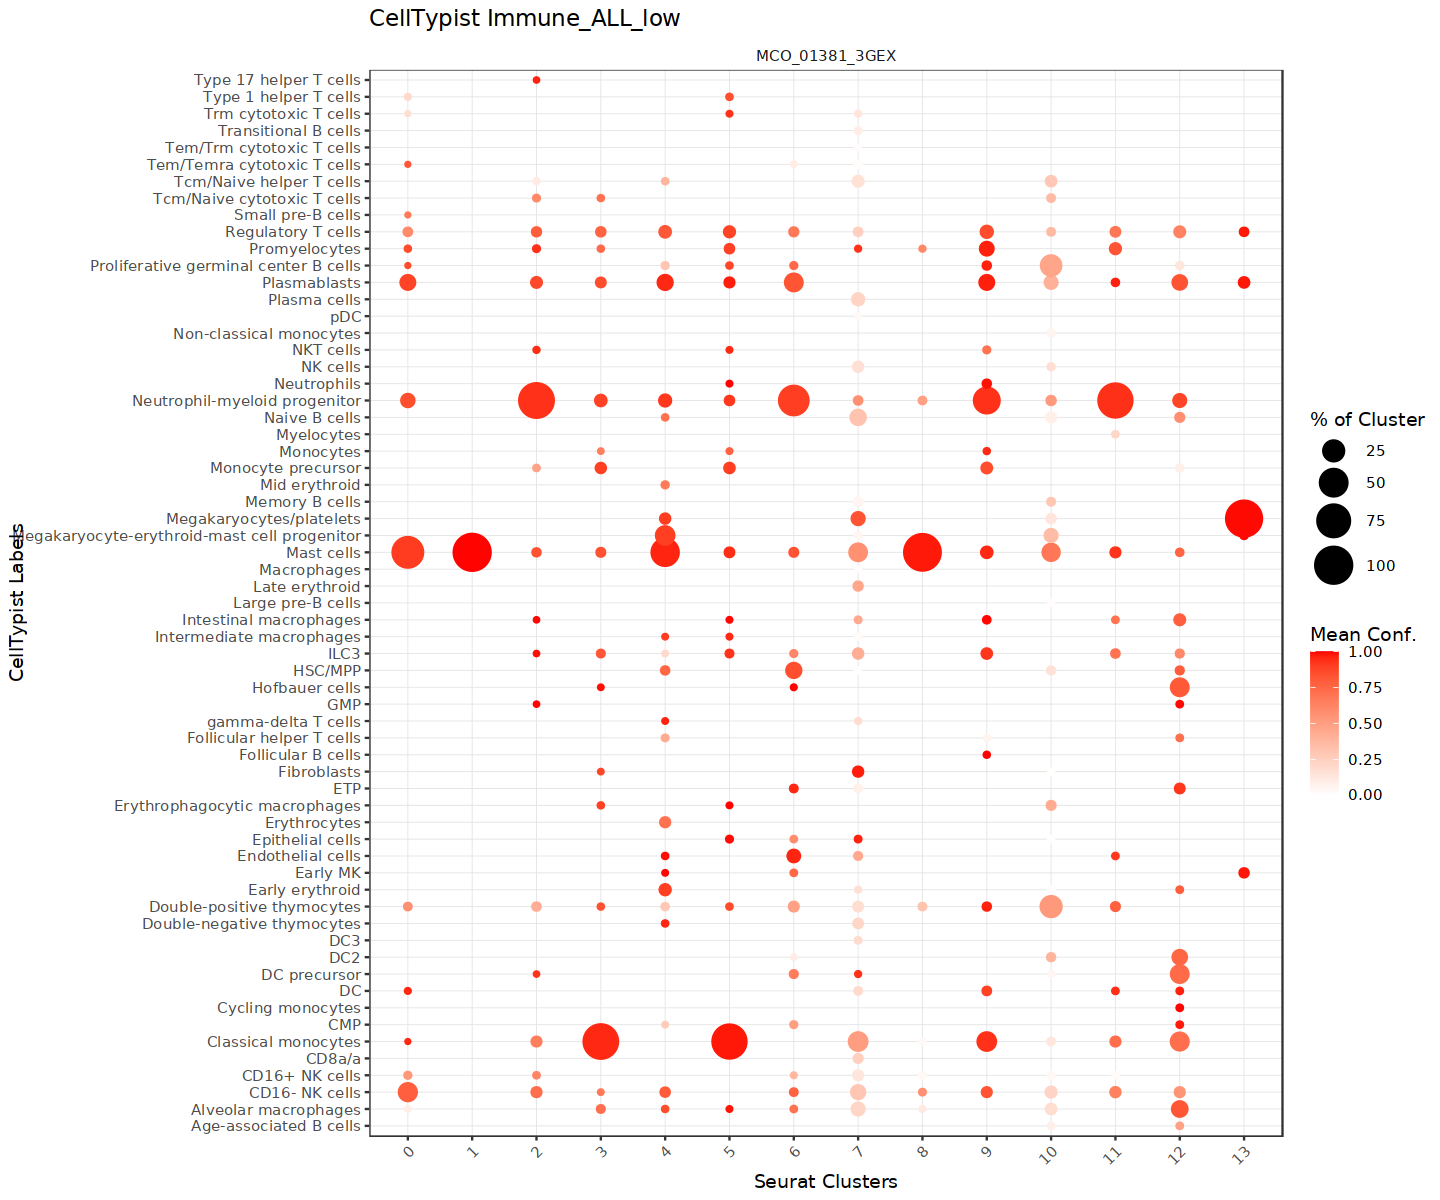

In [163]:

# 1. Sort clusters numerically for the X-axis
summary_final$seurat_clusters <- factor(summary_final$seurat_clusters, 
                                        levels = sort(as.numeric(unique(summary_final$seurat_clusters))))

# 2. Create the Dot Plot
dotplot_annotation <- ggplot(summary_final, aes(x = seurat_clusters, 
                                                y = CellTypist_label_Immune_ALL_low)) +
  # Use geom_point where size and color represent your calculated metrics
  geom_point(aes(size = percentage, color = mean_conf_score)) +
  
  # Set the color gradient from white to red
  # limits c(0,1) ensures the scale is consistent for confidence scores
  scale_color_gradient(low = "white", high = "red", limits = c(0, 1), name = "Mean Conf.") +
  
  # Adjust the size scale to make dots visible but not overlapping
  scale_size_continuous(range = c(1, 10), name = "% of Cluster") +
  
  # Grid by sample
  facet_grid(. ~ orig.ident, scales = "free_x", space = "free_x") +
  
  # Clean theme and labels
  theme_bw() +
  labs(
    title = "CellTypist Immune_ALL_low",
    x = "Seurat Clusters",
    y = "CellTypist Labels"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_line(linewidth = 0.2, color = "grey90"),
    strip.background = element_blank(),
    legend.position = "right"
  )

# Display plot
dotplot_annotation

In [164]:
setwd(path_graphs)

svgname<-paste("Dot_plot_Immune_ALL_low_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot_annotation,
         device="svg", width =13, height = 13)
}

# Factor orig.ident

In [165]:
unique(adata@meta.data$orig.ident)

[1] "MCO_01381_3GEX"

In [166]:
adata@meta.data$orig.ident<-factor(adata@meta.data$orig.ident,
                                                   levels=c('MCO_01381_3GEX'),
                                                   ordered=T)

In [167]:
setwd("/scratch/manuel.tardaguila/2026_Ditadi_test/processing_outputs/")

In [ ]:
saveRDS(adata, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")